In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import meteostat as met

### Functions needed in preprocessing

In [3]:
def calculating_iqr(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    q2 = q3 - q1
    upper = q3 + (1.5 * q2)
    lower = q1 - (1.5 * q1)
    return lower,upper

In [4]:
handle_outliers = lambda x: lower if x < lower else(upper if x > upper else x)

In [5]:
def cal_col(data):
    num_col = data.select_dtypes(include=['float64','int64']).columns
    col = data.columns
    return col,num_col

In [6]:
def cal_corr(num_col,data,ann = True):
    corr = data[num_col].corr()
    sns.heatmap(data = corr, annot = ann)
    plt.show()

In [7]:
def dropping_col_based_on_nulls_precentage(data):
    threshold = data.shape[0] * 0.5
    col_to_drop = data.columns[data.isna().sum() >= threshold]
    data.drop(col_to_drop, inplace = True,axis = 1)
    return data

### reading files

In [15]:
country_wise_df = pd.read_csv('country_wise_latest.csv')

In [17]:
covid_19_clean_complete_df = pd.read_csv("covid_19_clean_complete.csv")

In [19]:
full_grouped_df = pd.read_csv('full_grouped.csv')

In [21]:
day_wise_df = pd.read_csv('day_wise.csv')

In [23]:
usa_county_wise_df = pd.read_csv('usa_county_wise.csv')

In [24]:
worldometer_data_df = pd.read_csv('worldometer_data.csv')

### Working with country_wise dataset

In [26]:
country_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [27]:
col,num_col = cal_col(country_wise_df)

In [28]:
country_wise_df.describe()

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

from previous statistics measurements we will find out that there are outliers in most of these columns 
let's start with ploting them 
then calculating the IQR and apply Winsorizing

#### handling Outliers

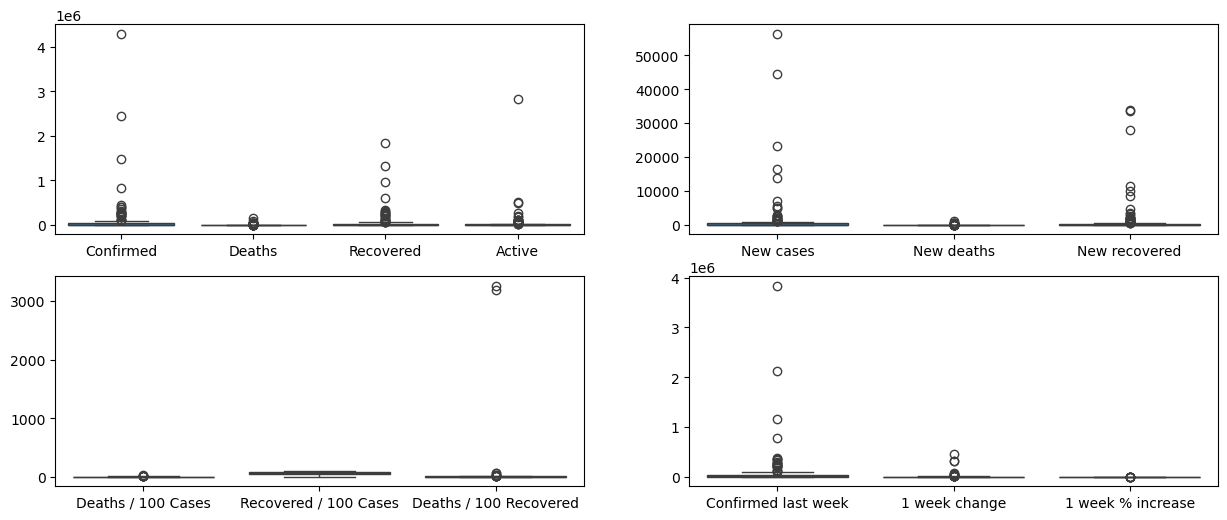

In [36]:
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.boxplot(data= country_wise_df[num_col[:4]])

plt.subplot(2,2,2)
sns.boxplot(data= country_wise_df[num_col[4:7]])

plt.subplot(2,2,3)
sns.boxplot(data= country_wise_df[num_col[7:10]])

plt.subplot(2,2,4)
sns.boxplot(data= country_wise_df[num_col[10:]])
plt.show()

In [37]:
for i in num_col:
    lower,upper = calculating_iqr(country_wise_df,i)
    country_wise_df[i] = country_wise_df[i].apply(handle_outliers)

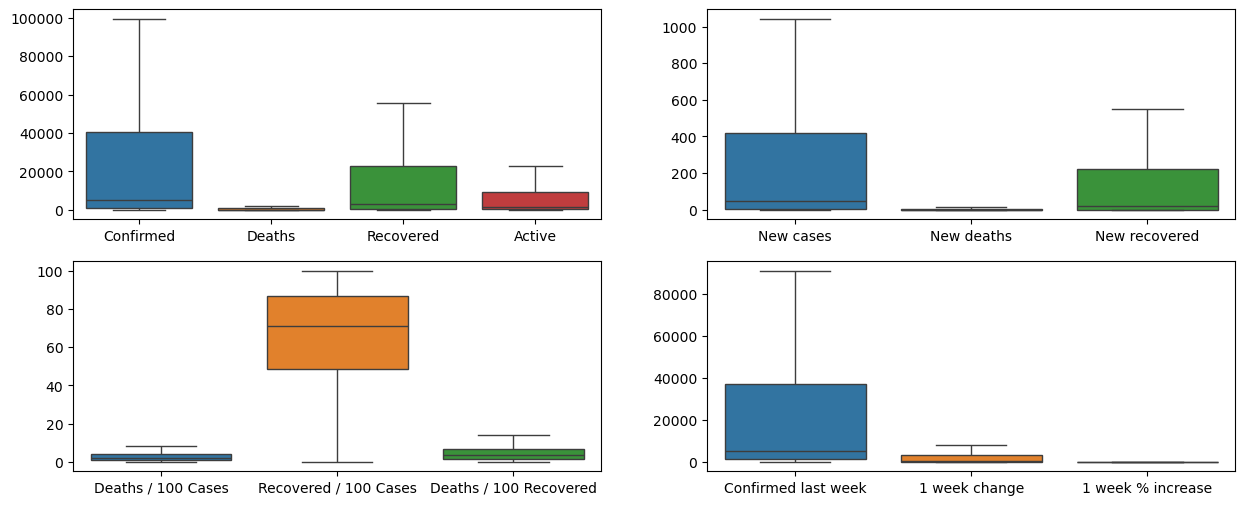

In [38]:
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.boxplot(data= country_wise_df[num_col[:4]])

plt.subplot(2,2,2)
sns.boxplot(data= country_wise_df[num_col[4:7]])

plt.subplot(2,2,3)
sns.boxplot(data= country_wise_df[num_col[7:10]])

plt.subplot(2,2,4)
sns.boxplot(data= country_wise_df[num_col[10:]])
plt.show()

In [41]:
country_wise_df.describe()

Confirmed       Deaths     Recovered        Active    New cases  \
count    187.000000   187.000000    187.000000    187.000000   187.000000   
mean   25944.139037   510.172460  14132.883690   6266.176471   264.544118   
std    35481.834416   700.605387  19846.563715   8514.912668   366.343842   
min       10.000000     0.000000      0.000000      0.000000     0.000000   
25%     1114.000000    18.500000    626.500000    141.500000     4.000000   
50%     5059.000000   108.000000   2815.000000   1600.000000    49.000000   
75%    40460.500000   734.000000  22606.000000   9149.000000   419.500000   
max    99480.250000  1807.250000  55575.250000  22660.250000  1042.750000   

       New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count  187.000000     187.000000          187.000000             187.000000   
mean     3.802139     144.483957            2.697005              64.820535   
std      5.496665     205.116423            2.255514              26.287694   
min      0.000000       0.000000            0.000000               0.000000   
25%      0.000000       0.000000            0.945000              48.770000   
50%      1.000000      22.000000            2.150000              71.320000   
75%      6.000000     221.000000            3.875000              86.885000   
max     15.000000     552.500000            8.270000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count              187.000000           187.000000     187.000000   
mean                 4.768289         23604.331551    2022.804813   
std                  4.249337         32536.210181    2773.893022   
min                  0.000000            10.000000     -24.500000   
25%                  1.450000          1051.500000      49.000000   
50%                  3.620000          5020.000000     432.000000   
75%                  6.440000         37080.500000    3172.000000   
max                 13.925000         91124.000000    7856.500000   

       1 week % increase  
count         187.000000  
mean           11.167340  
std            10.918431  
min            -1.387500  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max            37.975000

#### Applying feature engineering

In [43]:
country_wise_df['Total cases'] = country_wise_df['Confirmed'] + country_wise_df['New cases']

In [46]:
country_wise_df['Total deaths'] = country_wise_df['Deaths'] + country_wise_df['New deaths']

In [49]:
country_wise_df['Total recovered'] = country_wise_df['Recovered'] + country_wise_df['New recovered']

In [51]:
country_wise_df['Total active'] = country_wise_df['Total cases'] - (country_wise_df['Total deaths'] + country_wise_df['Total recovered'])

In [53]:
country_wise_df['Active / 100 Cases'] = 100 - ( country_wise_df['Deaths / 100 Cases'] + country_wise_df['Recovered / 100 Cases'])

In [55]:
col,num_col = cal_col(country_wise_df)

#### Getting relations using correlation

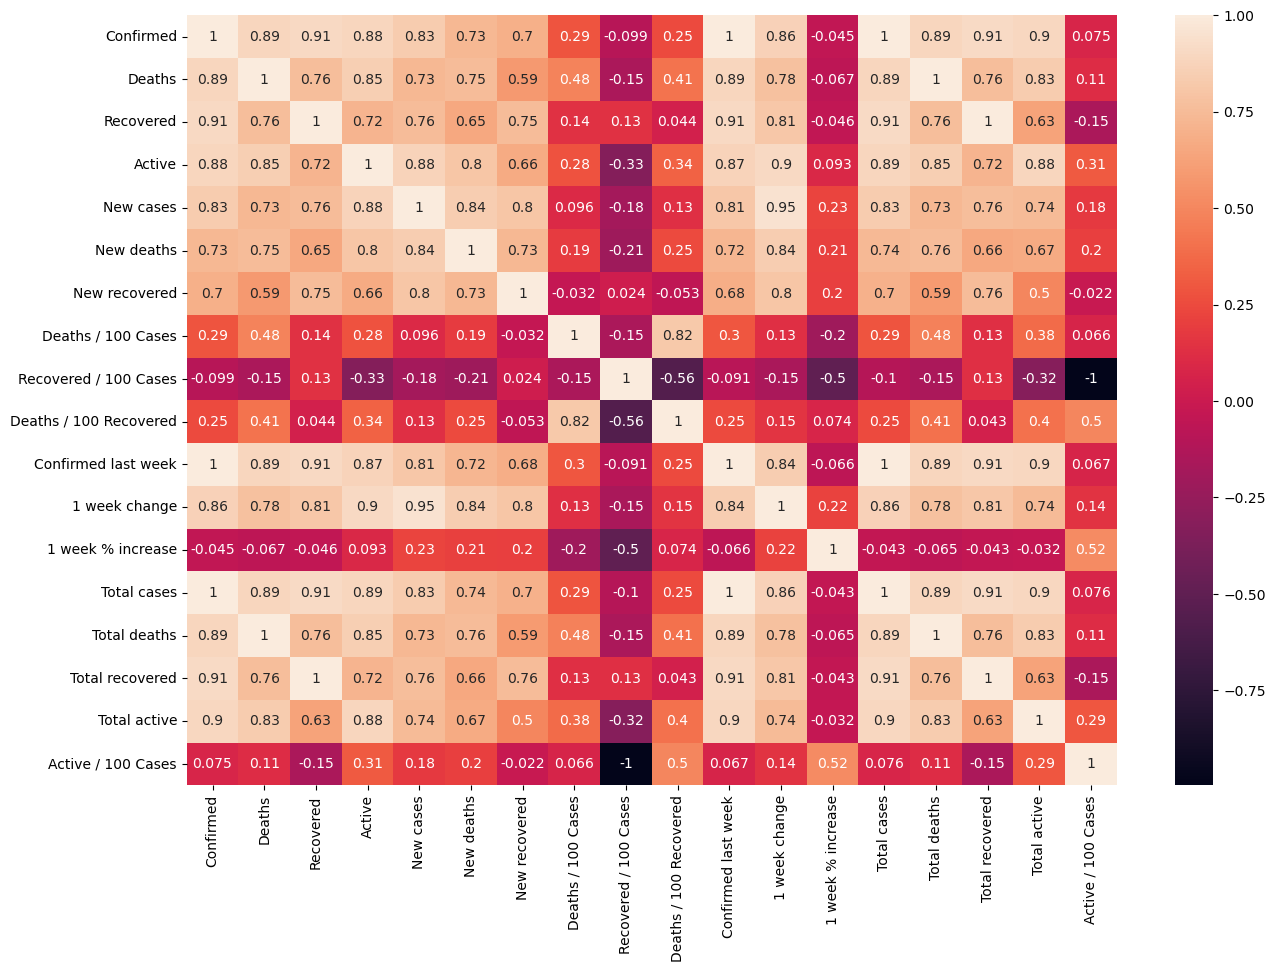

In [58]:
plt.figure(figsize=(15, 10))
cal_corr(num_col,country_wise_df)

In [59]:
max_countries_in_active_in_each_who_region = country_wise_df.groupby('WHO Region')['Country/Region'].agg({max_death := ('Total deaths',"max"), max_confirmed := ('Total cases','max'),max_recovered := ('Total recovered','max')})
max_countries_in_active_in_each_who_region

Total deaths  Total cases Total recovered
WHO Region                                                     
Africa                    Zimbabwe     Zimbabwe        Zimbabwe
Americas                 Venezuela    Venezuela       Venezuela
Eastern Mediterranean        Yemen        Yemen           Yemen
Europe                  Uzbekistan   Uzbekistan      Uzbekistan
South-East Asia        Timor-Leste  Timor-Leste     Timor-Leste
Western Pacific            Vietnam      Vietnam         Vietnam

In [60]:
max_countries_in_active_in_each_who_region_per = country_wise_df.groupby('WHO Region')['Country/Region'].agg({max_death_100_cases := ('Deaths / 100 Cases country',"max"), max_recover_100_cases := ('Recovered / 100 Cases country','max'),max_death_for_100_recover := ('Deaths / 100 Recovered country','max')})
max_countries_in_active_in_each_who_region_per

Deaths / 100 Recovered country  \
WHO Region                                             
Africa                                      Zimbabwe   
Americas                                   Venezuela   
Eastern Mediterranean                          Yemen   
Europe                                    Uzbekistan   
South-East Asia                          Timor-Leste   
Western Pacific                              Vietnam   

                      Deaths / 100 Cases country Recovered / 100 Cases country  
WHO Region                                                                      
Africa                                  Zimbabwe                      Zimbabwe  
Americas                               Venezuela                     Venezuela  
Eastern Mediterranean                      Yemen                         Yemen  
Europe                                Uzbekistan                    Uzbekistan  
South-East Asia                      Timor-Leste                   Timor-Leste  
Western Pacific                          Vietnam                       Vietnam

In [61]:
num_col

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase', 'Total cases', 'Total deaths', 'Total recovered',
       'Total active', 'Active / 100 Cases'],
      dtype='object')

In [62]:
country_wise_df[num_col[6:]].describe()

New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count     187.000000          187.000000             187.000000   
mean      144.483957            2.697005              64.820535   
std       205.116423            2.255514              26.287694   
min         0.000000            0.000000               0.000000   
25%         0.000000            0.945000              48.770000   
50%        22.000000            2.150000              71.320000   
75%       221.000000            3.875000              86.885000   
max       552.500000            8.270000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count              187.000000           187.000000     187.000000   
mean                 4.768289         23604.331551    2022.804813   
std                  4.249337         32536.210181    2773.893022   
min                  0.000000            10.000000     -24.500000   
25%                  1.450000          1051.500000      49.000000   
50%                  3.620000          5020.000000     432.000000   
75%                  6.440000         37080.500000    3172.000000   
max                 13.925000         91124.000000    7856.500000   

       1 week % increase    Total cases  Total deaths  Total recovered  \
count         187.000000     187.000000    187.000000       187.000000   
mean           11.167340   26208.683155    513.974599     14277.367647   
std            10.918431   35786.844542    704.750409     20001.296949   
min            -1.387500      10.000000      0.000000         0.000000   
25%             2.775000    1123.000000     18.500000       633.000000   
50%             6.890000    5068.000000    108.000000      3016.000000   
75%            16.855000   41017.000000    742.000000     22849.000000   
max            37.975000  100523.000000   1822.250000     56127.750000   

       Total active  Active / 100 Cases  
count    187.000000          187.000000  
mean   11417.340909           32.482460  
std    18976.878127           26.042935  
min        0.000000            0.000000  
25%      146.000000           10.935000  
50%     1647.000000           26.250000  
75%    10419.750000           48.085000  
max    98344.000000          100.000000

In [63]:
who_reg_val = country_wise_df['WHO Region'].unique()
who_reg_val

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

#### Plotting

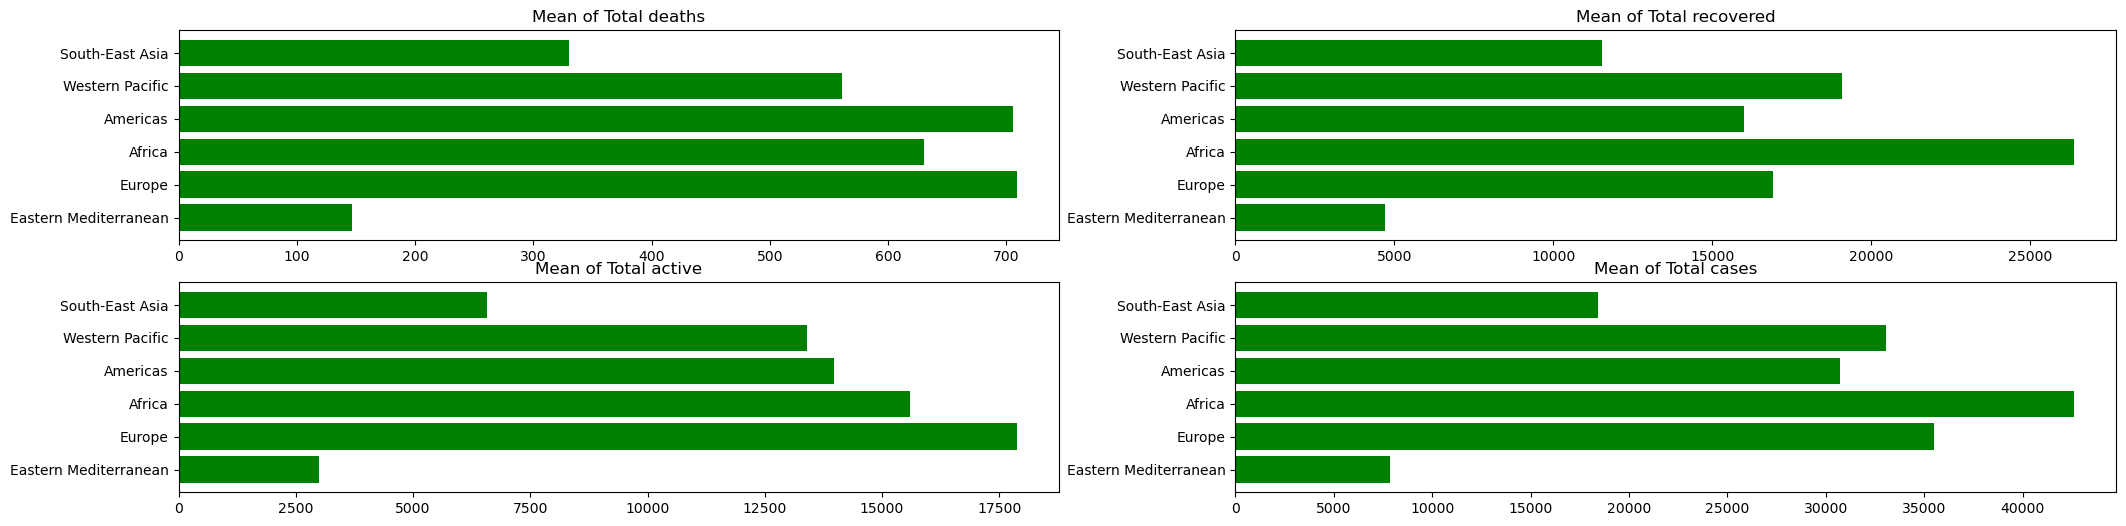

In [71]:
plt.figure(figsize=(25, 6))
plt.subplot(2,2,1)
plt.barh(who_reg_val,country_wise_df.groupby('WHO Region')['Total deaths'].mean(),color = 'green')
plt.title('Mean of Total deaths')

plt.subplot(2,2,2)
plt.barh(who_reg_val,country_wise_df.groupby('WHO Region')['Total recovered'].mean(),color = 'green')
plt.title('Mean of Total recovered')

plt.subplot(2,2,3)
plt.barh(who_reg_val,country_wise_df.groupby('WHO Region')['Total active'].mean(),color = 'green')
plt.title('Mean of Total active')

plt.subplot(2,2,4)
plt.barh(who_reg_val,country_wise_df.groupby('WHO Region')['Total cases'].mean(),color = 'green')
plt.title('Mean of Total cases')

plt.show()

In [72]:
#countries =  max_countries_in_active_in_each_who_region.loc[:,'Total recovered']
countries = list(x for x in max_countries_in_active_in_each_who_region["Total recovered"])
countries

['Zimbabwe', 'Venezuela', 'Yemen', 'Uzbekistan', 'Timor-Leste', 'Vietnam']

In [75]:
y = country_wise_df[ country_wise_df['Country/Region'].isin(countries)]

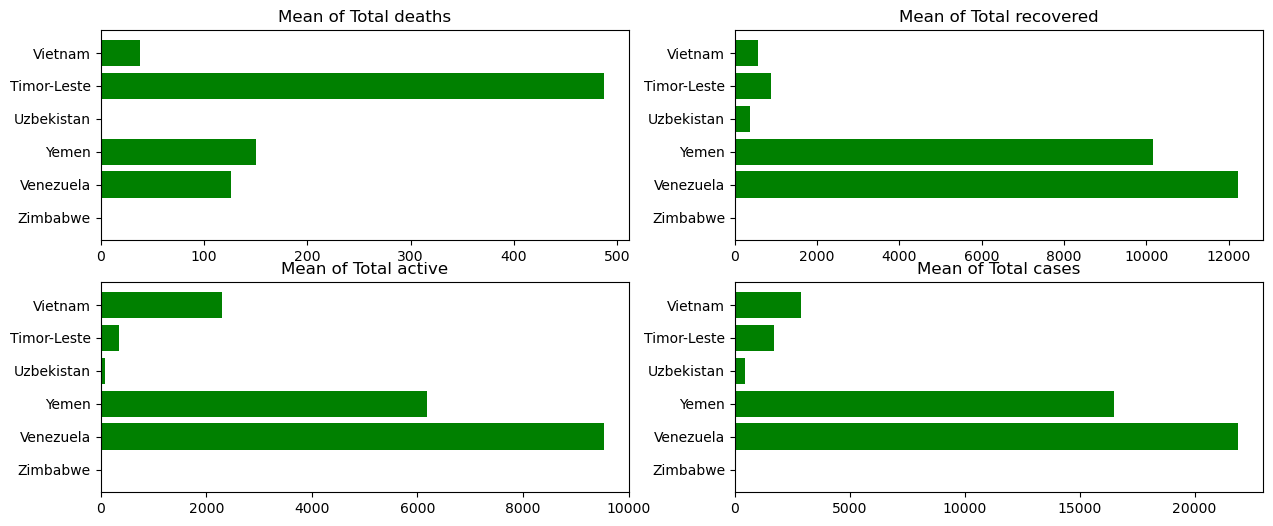

In [76]:
plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
plt.barh(countries, y['Total deaths'],color = 'green')
plt.title('Mean of Total deaths')

plt.subplot(2,2,2)
plt.barh(countries, y['Total recovered'],color = 'green')
plt.title('Mean of Total recovered')

plt.subplot(2,2,3)
plt.barh(countries, y['Total active'],color = 'green')
plt.title('Mean of Total active')

plt.subplot(2,2,4)
plt.barh(countries, y['Total cases'],color = 'green')
plt.title('Mean of Total cases')

plt.show()

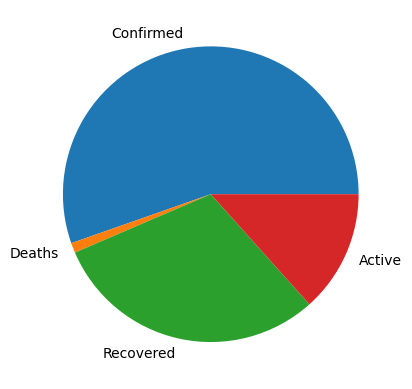

In [78]:
plt.pie(country_wise_df[num_col[:4]].sum(),labels = num_col[:4])
plt.show()

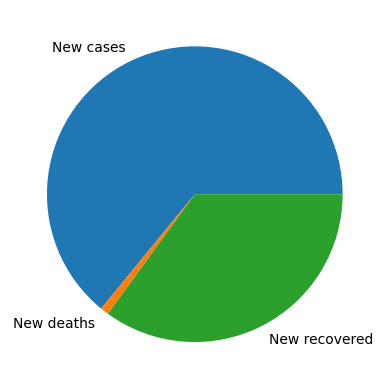

In [79]:
plt.pie(country_wise_df[num_col[4:7]].sum(),labels = num_col[4:7])
plt.show()

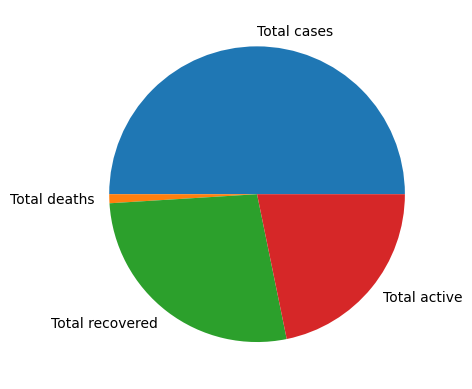

In [80]:
plt.pie(country_wise_df[num_col[-5:-1]].sum(),labels = num_col[-5:-1])
plt.show()

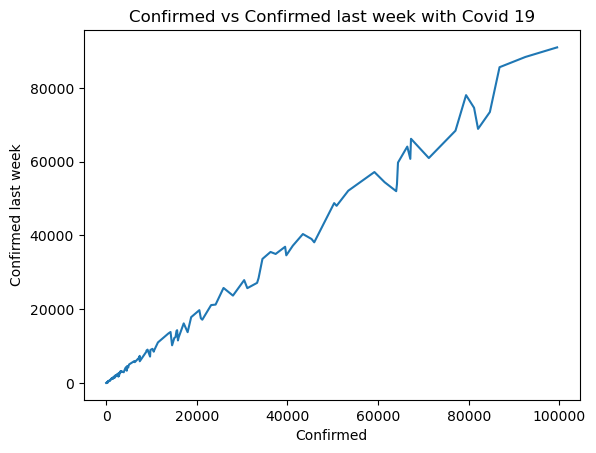

In [81]:
sns.lineplot(x='Confirmed', y='Confirmed last week', data=country_wise_df)
plt.title("Confirmed vs Confirmed last week with Covid 19")
plt.show()

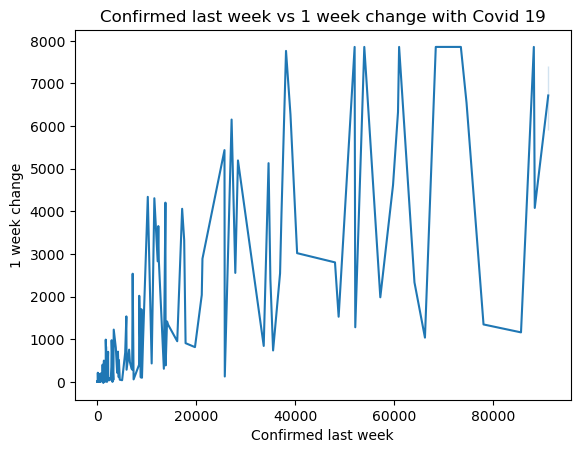

In [82]:
sns.lineplot(x='Confirmed last week', y='1 week change', data=country_wise_df)
plt.title("Confirmed last week vs 1 week change with Covid 19")
plt.show()

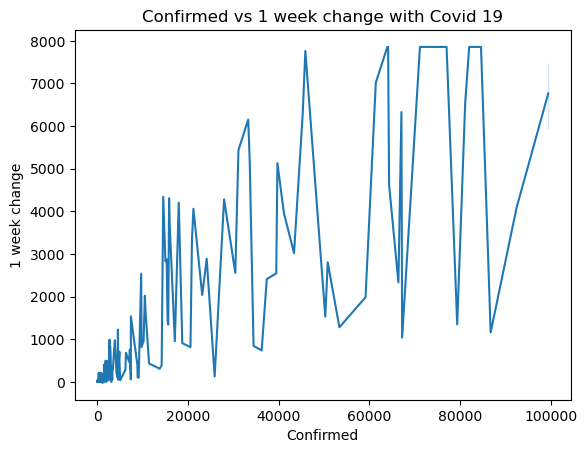

In [83]:
sns.lineplot(x='Confirmed', y='1 week change', data=country_wise_df)
plt.title("Confirmed vs 1 week change with Covid 19")
plt.show()

#### Analysis Results:
* The highest WHO Region in
    * 'Total cases' of Covid 19
        1. Africa
        2. Europe
    * 'Total active'
        1. Europe
        2. Africa
    * 'Total recovered'
        1. Europe
        2. Western Pacific
    * 'Total deaths'
        1. Europe
        2. Americans
*  For each WHO region has x countries and for the maximum value in each one:
    * for total recovered column
        1. Venezuela
        2. Yemen
    * for total cases column
        1. Venezuela
        2. Yemen
    * for Total deaths column
        1. Timor-Leste
        2. Yemen
    * for active column
        1. Venezuela
        2. Yemen
* Over weeks the number of confirmed cases are increasing
* Deaths has the lowest precentage over the different cases
* Recovered cases have the second highest percentage over time

### Working with covid_19_clean_complete dataset

In [86]:
covid_19_clean_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [87]:
row = covid_19_clean_complete_df.shape[0]
nu = covid_19_clean_complete_df['Province/State'].isnull().sum()
non_null = row - nu
percent_state = (non_null / row) * 100
percent_state

29.88505747126437

As the percentage of column Province/State is 29% then it is best to drop the column

In [89]:
covid_19_clean_complete_df = covid_19_clean_complete_df.drop(columns = ['Province/State'])

In [90]:
col,num_col = cal_col(covid_19_clean_complete_df)

In [91]:
covid_19_clean_complete_df.head()

Country/Region       Lat       Long        Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1        Albania  41.15330  20.168300  2020-01-22          0       0   
2        Algeria  28.03390   1.659600  2020-01-22          0       0   
3        Andorra  42.50630   1.521800  2020-01-22          0       0   
4         Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [92]:
covid_19_clean_complete_df.tail()

Country/Region        Lat       Long        Date  Confirmed  \
49063  Sao Tome and Principe   0.186400   6.613100  2020-07-27        865   
49064                  Yemen  15.552727  48.516388  2020-07-27       1691   
49065                Comoros -11.645500  43.333300  2020-07-27        354   
49066             Tajikistan  38.861000  71.276100  2020-07-27       7235   
49067                Lesotho -29.610000  28.233600  2020-07-27        505   

       Deaths  Recovered  Active             WHO Region  
49063      14        734     117                 Africa  
49064     483        833     375  Eastern Mediterranean  
49065       7        328      19                 Africa  
49066      60       6028    1147                 Europe  
49067      12        128     365                 Africa

In [93]:
covid_19_clean_complete_df['Date'] = pd.to_datetime(covid_19_clean_complete_df['Date'])

In [94]:
covid_19_clean_complete_df['Month'] =  covid_19_clean_complete_df['Date'].dt.month

In [96]:
covid_19_clean_complete_df['Day'] =  covid_19_clean_complete_df['Date'].dt.day

In [97]:
col,num_col = cal_col(covid_19_clean_complete_df)

In [100]:
covid_19_clean_complete_df.describe()

Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active         Month           Day  
count   49068.000000  4.906800e+04  4.906800e+04  49068.000000  49068.000000  
mean      884.179160  7.915713e+03  8.085012e+03      4.281915     15.957447  
min         0.000000  0.000000e+00 -1.400000e+01      1.000000      1.000000  
25%         0.000000  0.000000e+00  0.000000e+00      3.000000      8.000000  
50%         2.000000  2.900000e+01  2.600000e+01      4.000000     16.000000  
75%        30.000000  6.660000e+02  6.060000e+02      6.000000     24.000000  
max    148011.000000  1.846641e+06  2.816444e+06      7.000000     31.000000  
std      6313.584411  5.480092e+04  7.625890e+04      1.810241      8.770100

In [101]:
num_col

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

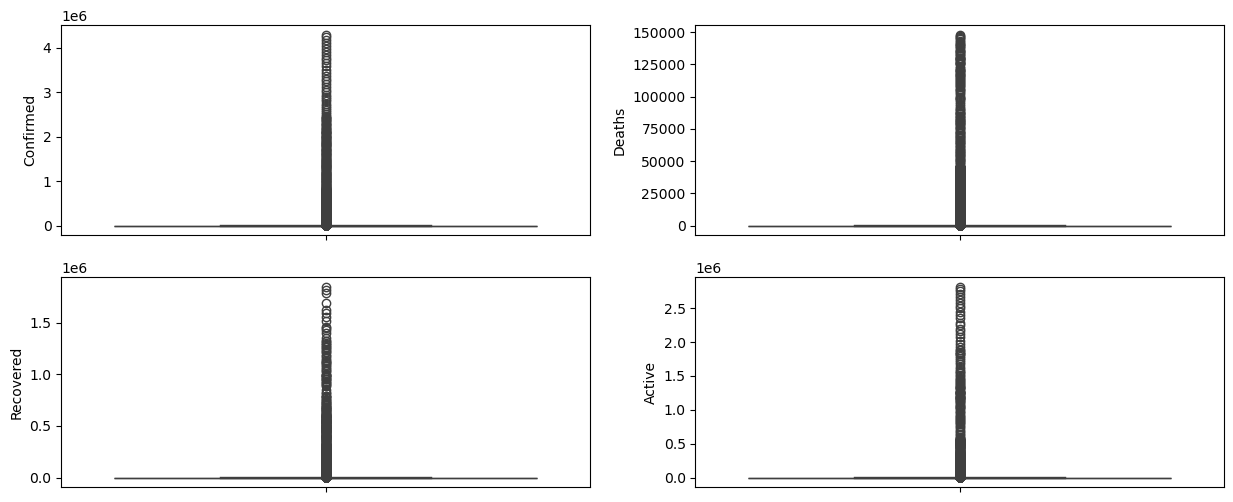

In [102]:
# Ploting before handling outliers
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.boxplot(data= covid_19_clean_complete_df[num_col[2]])

plt.subplot(2,2,2)
sns.boxplot(data= covid_19_clean_complete_df[num_col[3]])

plt.subplot(2,2,3)
sns.boxplot(data= covid_19_clean_complete_df[num_col[4]])

plt.subplot(2,2,4)
sns.boxplot(data= covid_19_clean_complete_df[num_col[5]])
plt.show()

In [103]:
lower,upper = calculating_iqr(covid_19_clean_complete_df,num_col[2])
covid_19_clean_complete_df[num_col[2]] = covid_19_clean_complete_df[num_col[2]].apply(handle_outliers)

lower,upper = calculating_iqr(covid_19_clean_complete_df,num_col[3])
covid_19_clean_complete_df[num_col[3]] = covid_19_clean_complete_df[num_col[3]].apply(handle_outliers)

lower,upper = calculating_iqr(covid_19_clean_complete_df,num_col[4])
covid_19_clean_complete_df[num_col[4]] = covid_19_clean_complete_df[num_col[4]].apply(handle_outliers)

lower,upper = calculating_iqr(covid_19_clean_complete_df,num_col[5])
covid_19_clean_complete_df[num_col[5]] = covid_19_clean_complete_df[num_col[5]].apply(handle_outliers)

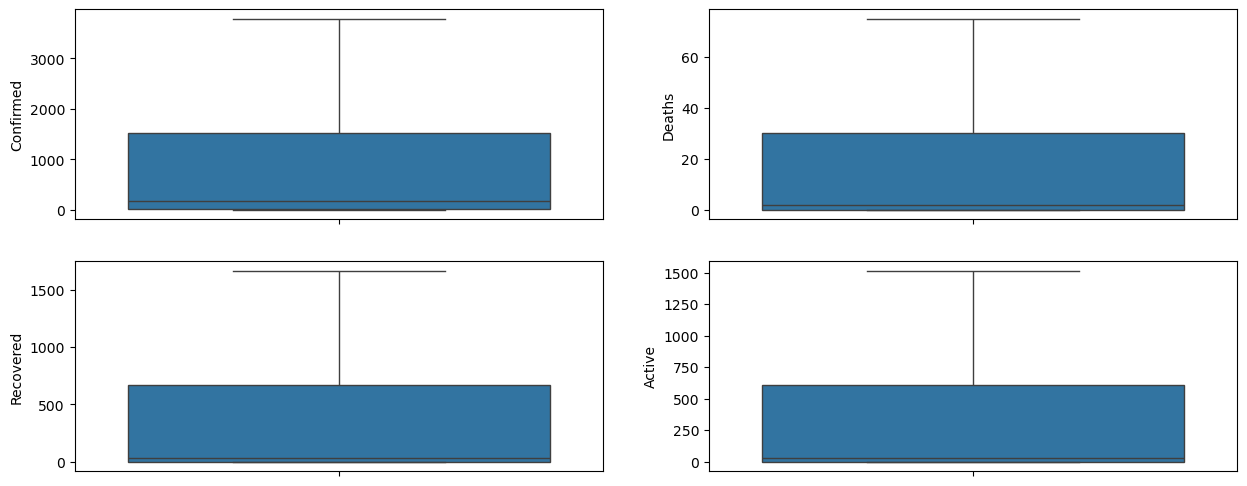

In [104]:
# Ploting after handling outliers
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.boxplot(data= covid_19_clean_complete_df[num_col[2]])

plt.subplot(2,2,2)
sns.boxplot(data= covid_19_clean_complete_df[num_col[3]])

plt.subplot(2,2,3)
sns.boxplot(data= covid_19_clean_complete_df[num_col[4]])

plt.subplot(2,2,4)
sns.boxplot(data= covid_19_clean_complete_df[num_col[5]])
plt.show()

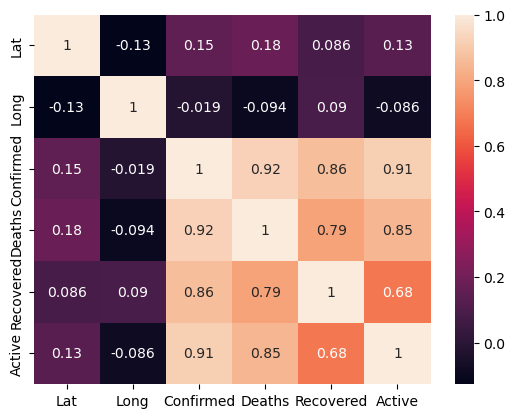

In [105]:
cal_corr(num_col,covid_19_clean_complete_df)

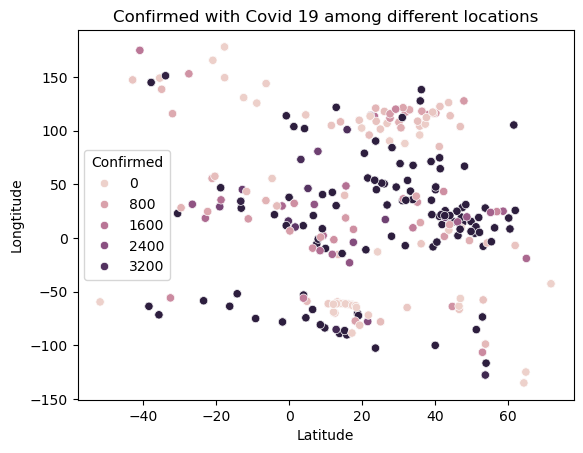

In [106]:
sns.scatterplot(x= 'Lat', y='Long',hue = 'Confirmed', data=covid_19_clean_complete_df)
plt.title("Confirmed with Covid 19 among different locations")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()

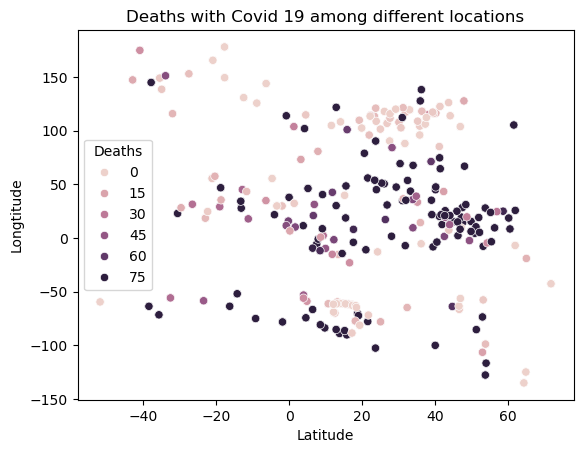

In [107]:
sns.scatterplot(x= 'Lat', y='Long',hue = 'Deaths', data=covid_19_clean_complete_df)
plt.title("Deaths with Covid 19 among different locations")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()

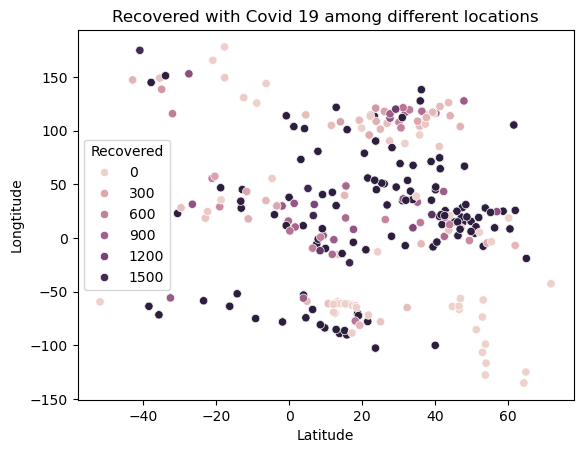

In [108]:
sns.scatterplot(x= 'Lat', y='Long',hue = 'Recovered', data=covid_19_clean_complete_df)
plt.title("Recovered with Covid 19 among different locations")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()

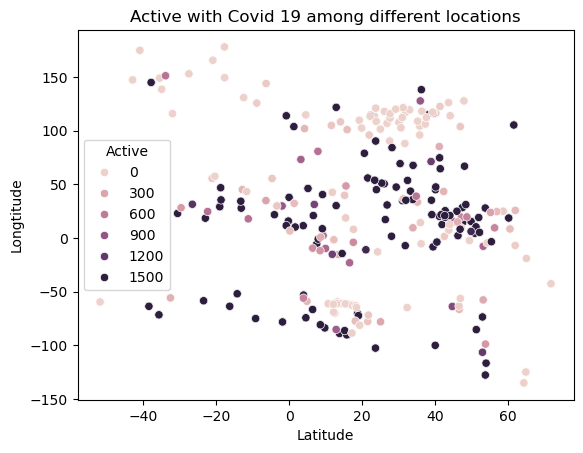

In [109]:
sns.scatterplot(x= 'Lat', y='Long',hue = 'Active', data=covid_19_clean_complete_df)
plt.title("Active with Covid 19 among different locations")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()

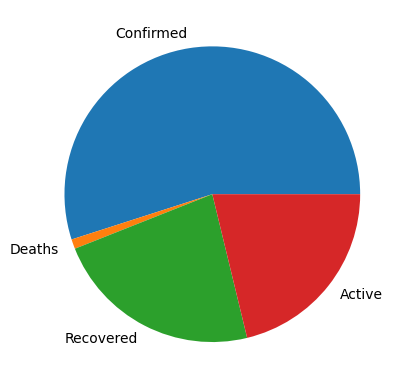

In [110]:
plt.pie(covid_19_clean_complete_df[num_col[2:]].sum(),labels = num_col[2:])
plt.show()

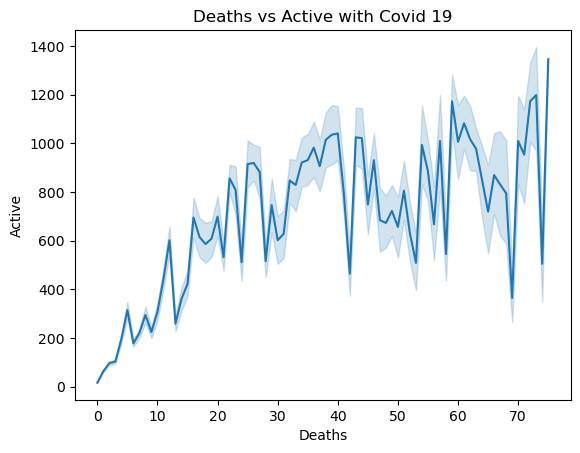

In [111]:
sns.lineplot(x='Deaths', y='Active', data=covid_19_clean_complete_df)
plt.title("Deaths vs Active with Covid 19")
plt.show()

##### From previous analysis we found that 
* high relationship between different cases for people with covid 19 
* the location doesn't make an enough reason for having Covid 19
* Deaths for having Covid 19 take the least percentage 

### Working with day_wise dataset

In [114]:
col,num_col = cal_col(day_wise_df)

In [115]:
day_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [116]:
day_wise_df['Date'] = pd.to_datetime(day_wise_df['Date'])

In [117]:
day_wise_df.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [118]:
day_wise_df['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [119]:
day_wise_df['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [120]:
day_wise_df[num_col].describe()

Confirmed         Deaths     Recovered        Active      New cases  \
count  1.880000e+02     188.000000  1.880000e+02  1.880000e+02     188.000000   
mean   4.406960e+06  230770.760638  2.066001e+06  2.110188e+06   87771.021277   
std    4.757988e+06  217929.094183  2.627976e+06  1.969670e+06   75295.293255   
min    5.550000e+02      17.000000  2.800000e+01  5.100000e+02       0.000000   
25%    1.121910e+05    3935.000000  6.044125e+04  5.864175e+04    5568.500000   
50%    2.848733e+06  204190.000000  7.847840e+05  1.859759e+06   81114.000000   
75%    7.422046e+06  418634.500000  3.416396e+06  3.587015e+06  131502.500000   
max    1.648048e+07  654036.000000  9.468087e+06  6.358362e+06  282756.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   188.000000     188.000000          188.000000             188.000000   
mean   3478.824468   50362.015957            4.860638              34.343936   
std    2537.735652   56090.892479            1.579541              16.206159   
min       0.000000       0.000000            2.040000               1.710000   
25%     250.750000    2488.250000            3.510000              22.785000   
50%    4116.000000   30991.500000            4.850000              35.680000   
75%    5346.000000   79706.250000            6.297500              48.945000   
max    9966.000000  284394.000000            7.180000              57.450000   

       Deaths / 100 Recovered  No. of countries  
count              188.000000        188.000000  
mean                22.104521        144.351064  
std                 22.568307         65.175979  
min                  6.260000          6.000000  
25%                  9.650000        101.250000  
50%                 15.380000        184.000000  
75%                 25.342500        187.000000  
max                134.430000        187.000000

#### Handling Outliers

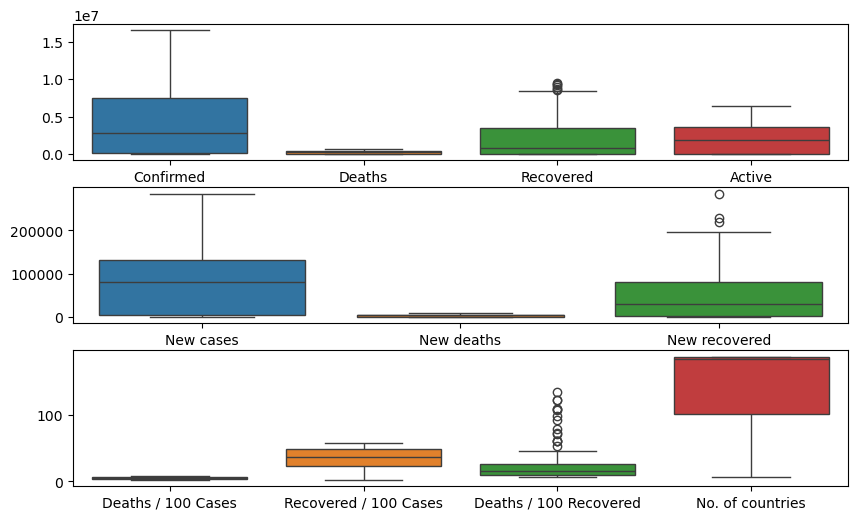

In [122]:
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
sns.boxplot(data= day_wise_df[num_col[:4]])

plt.subplot(3,1,2)
sns.boxplot(data= day_wise_df[num_col[4:7]])

plt.subplot(3,1,3)
sns.boxplot(data= day_wise_df[num_col[7:]])

plt.show()

In [123]:
lower,upper = calculating_iqr(day_wise_df,num_col[0])
day_wise_df[num_col[0]] = day_wise_df[num_col[0]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[1])
day_wise_df[num_col[1]] = day_wise_df[num_col[1]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[2])
day_wise_df[num_col[2]] = day_wise_df[num_col[2]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[3])
day_wise_df[num_col[3]] = day_wise_df[num_col[3]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[4])
day_wise_df[num_col[4]] = day_wise_df[num_col[4]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[5])
day_wise_df[num_col[5]] = day_wise_df[num_col[5]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[6])
day_wise_df[num_col[6]] = day_wise_df[num_col[6]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[7])
day_wise_df[num_col[7]] = day_wise_df[num_col[7]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[8])
day_wise_df[num_col[8]] = day_wise_df[num_col[8]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[9])
day_wise_df[num_col[9]] = day_wise_df[num_col[9]].apply(handle_outliers)

lower,upper = calculating_iqr(day_wise_df,num_col[10])
day_wise_df[num_col[10]] = day_wise_df[num_col[10]].apply(handle_outliers)

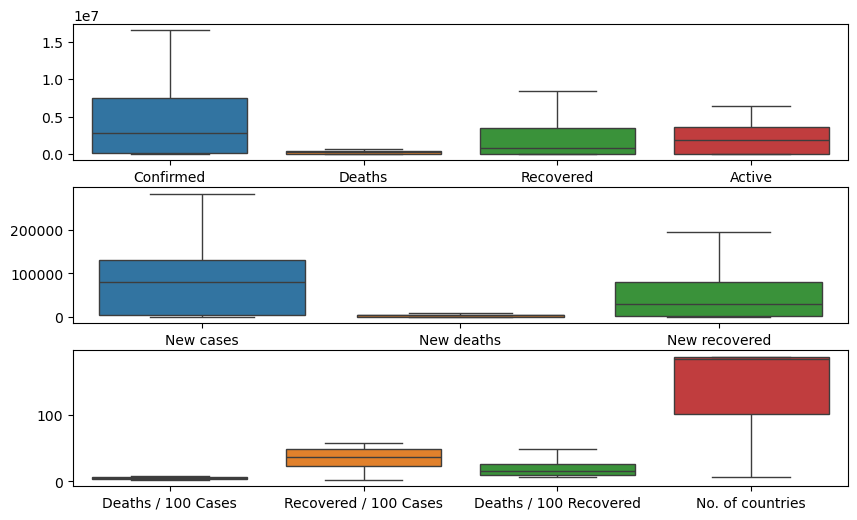

In [124]:
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
sns.boxplot(data= day_wise_df[num_col[:4]])

plt.subplot(3,1,2)
sns.boxplot(data= day_wise_df[num_col[4:7]])

plt.subplot(3,1,3)
sns.boxplot(data= day_wise_df[num_col[7:]])

plt.show()

#### Feature Engineering

In [143]:
day_wise_df['Total death'] = day_wise_df['Deaths'] + day_wise_df['New deaths']

In [145]:
day_wise_df['Total recovered'] = day_wise_df['Recovered'] + day_wise_df['New recovered']

In [146]:
day_wise_df['Total cases'] = day_wise_df['Confirmed'] + day_wise_df['New cases']

In [147]:
col,num_col = cal_col(day_wise_df)

#### PLotting

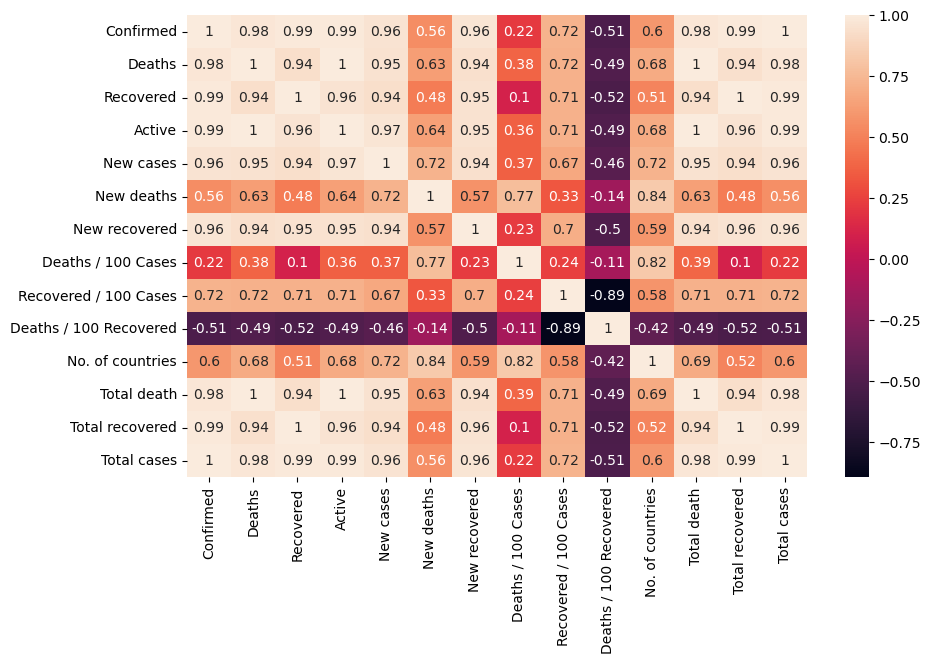

In [149]:
plt.figure(figsize=(10, 6))
cal_corr(num_col,day_wise_df)

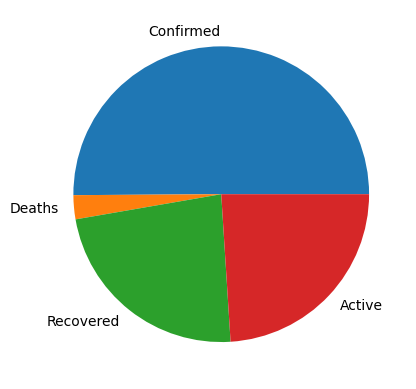

In [150]:
plt.pie(day_wise_df[num_col[:4]].sum(),labels = num_col[:4])
plt.show()

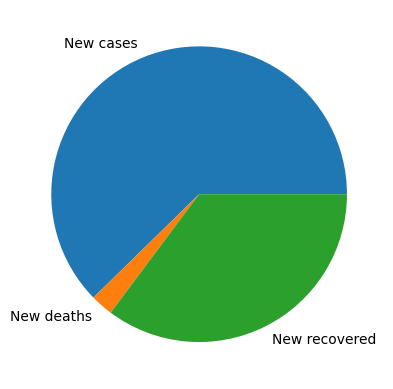

In [151]:
plt.pie(day_wise_df[num_col[4:7]].sum(),labels = num_col[4:7])
plt.show()

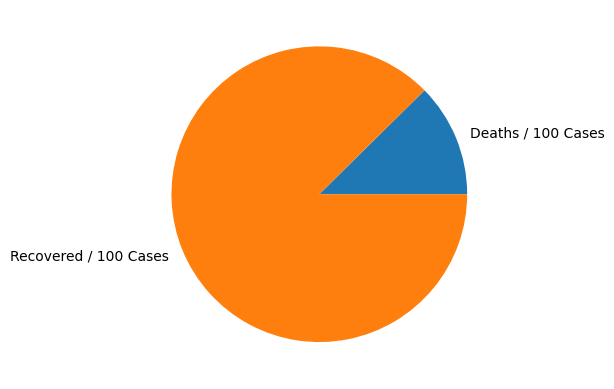

In [152]:
plt.pie(day_wise_df[num_col[7:9]].sum(),labels = num_col[7:9])
plt.show()

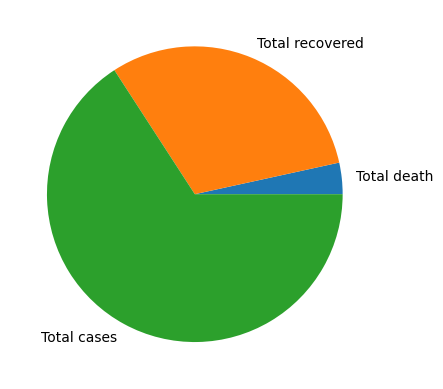

In [153]:
plt.pie(day_wise_df[num_col[-3:]].sum(),labels = num_col[-3:])
plt.show()

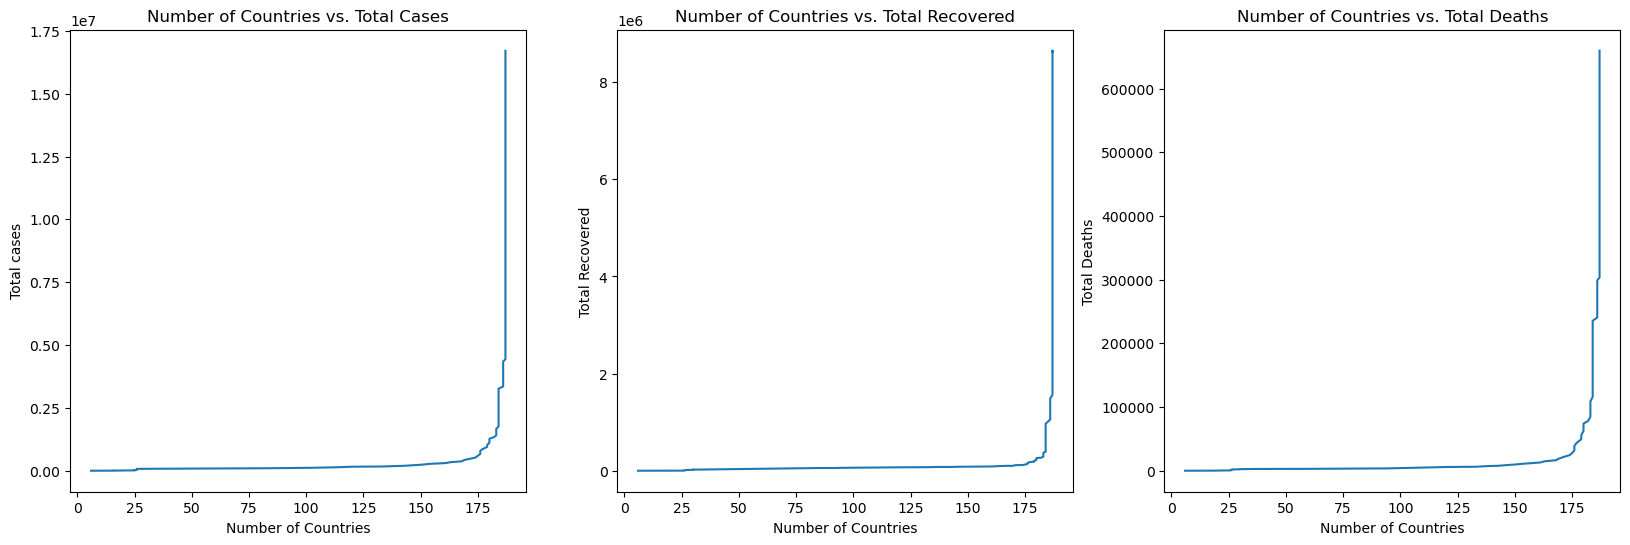

In [154]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[-1]])
plt.title("Number of Countries vs. Total Cases")
plt.xlabel("Number of Countries")
plt.ylabel("Total cases")

plt.subplot(1, 3, 2)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[-2]])
plt.title("Number of Countries vs. Total Recovered")
plt.xlabel("Number of Countries")
plt.ylabel("Total Recovered")

plt.subplot(1, 3, 3)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[-3]])
plt.title("Number of Countries vs. Total Deaths")
plt.xlabel("Number of Countries")
plt.ylabel("Total Deaths")

plt.show()

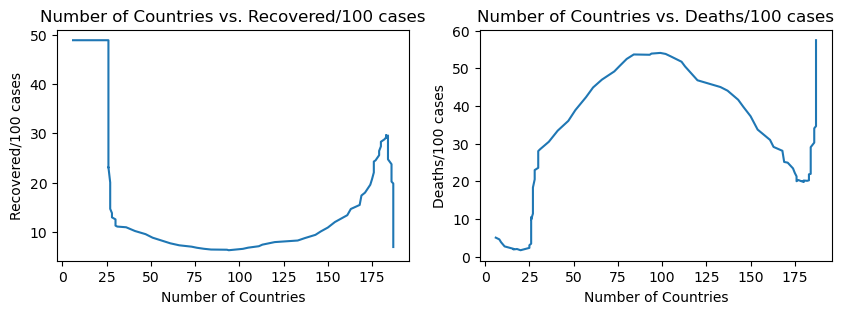

In [155]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[-5]])
plt.title("Number of Countries vs. Recovered/100 cases")
plt.xlabel("Number of Countries")
plt.ylabel("Recovered/100 cases")

plt.subplot(1, 2, 2)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[-6]])
plt.title("Number of Countries vs. Deaths/100 cases")
plt.xlabel("Number of Countries")
plt.ylabel("Deaths/100 cases")

plt.show()

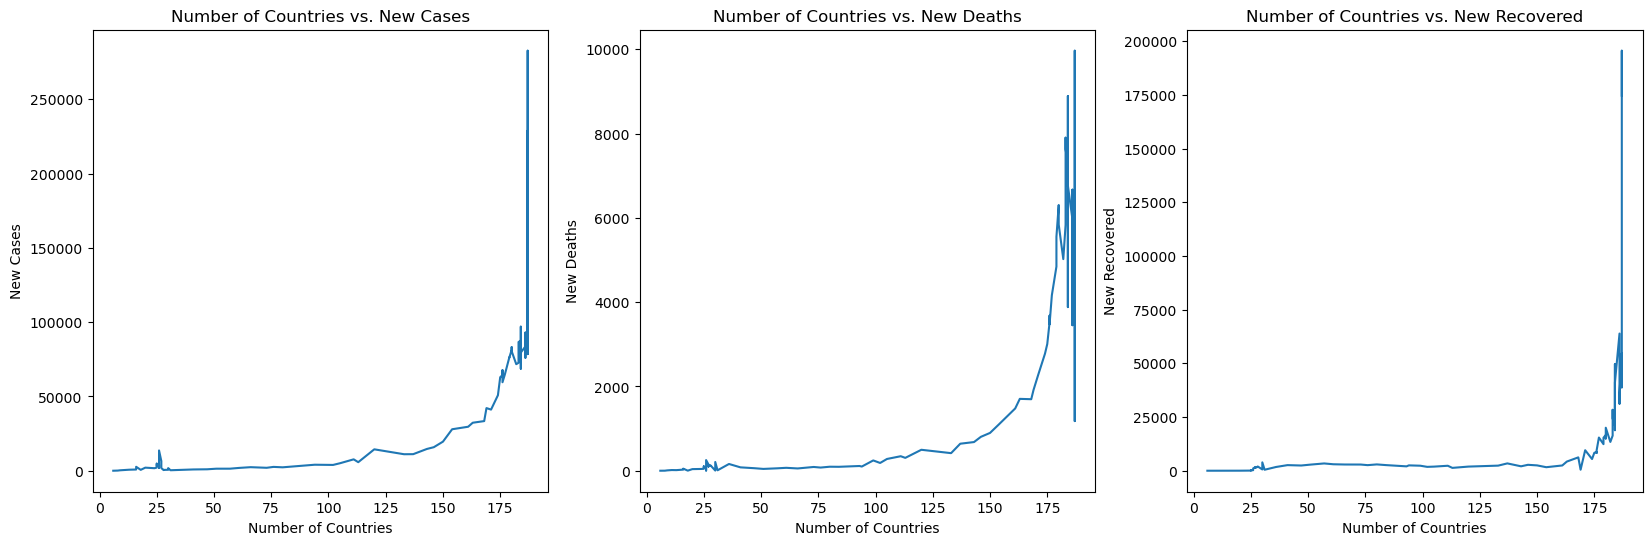

In [156]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[4]])
plt.title("Number of Countries vs. New Cases")
plt.xlabel("Number of Countries")
plt.ylabel("New Cases")

plt.subplot(1, 3, 2)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[5]])
plt.title("Number of Countries vs. New Deaths")
plt.xlabel("Number of Countries")
plt.ylabel("New Deaths")

plt.subplot(1, 3, 3)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[6]])
plt.title("Number of Countries vs. New Recovered")
plt.xlabel("Number of Countries")
plt.ylabel("New Recovered")

plt.show()

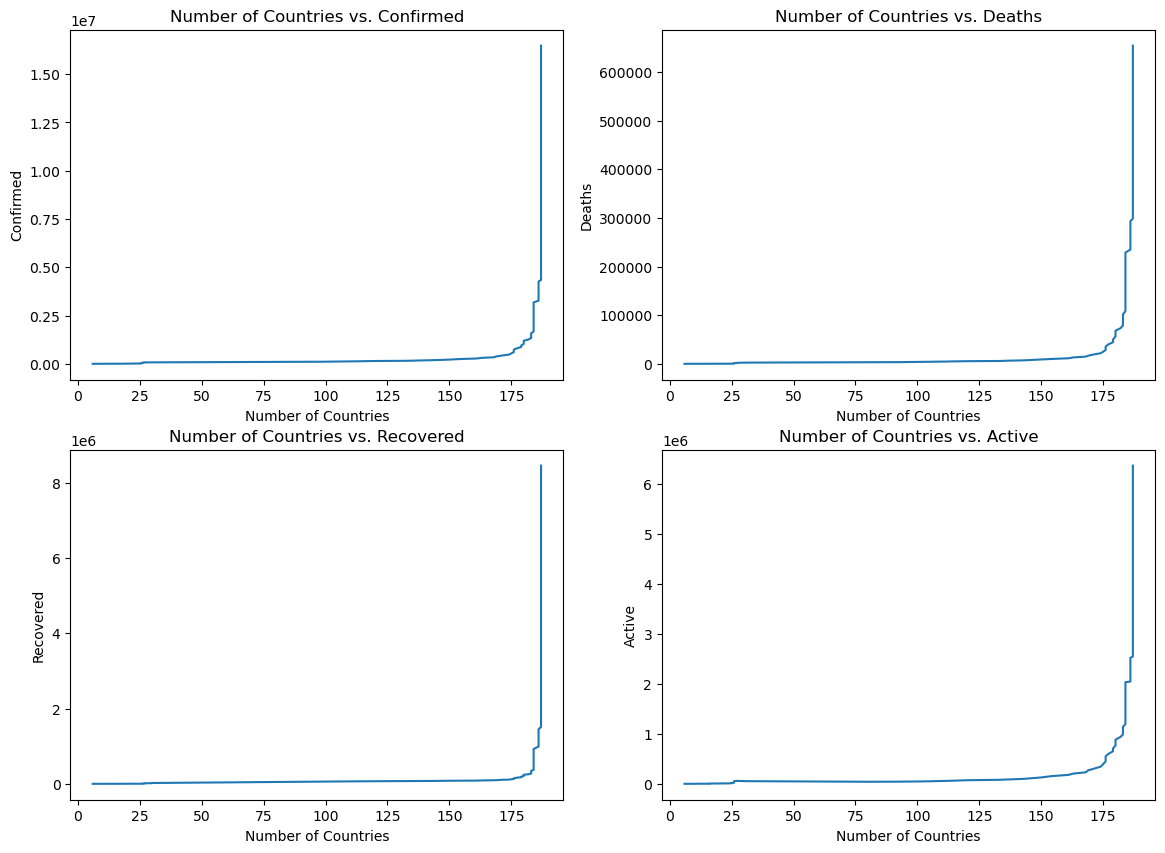

In [157]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[0]])
plt.title("Number of Countries vs. Confirmed")
plt.xlabel("Number of Countries")
plt.ylabel("Confirmed")

plt.subplot(2, 2, 2)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[1]])
plt.title("Number of Countries vs. Deaths")
plt.xlabel("Number of Countries")
plt.ylabel("Deaths")

plt.subplot(2, 2, 3)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[2]])
plt.title("Number of Countries vs. Recovered")
plt.xlabel("Number of Countries")
plt.ylabel("Recovered")

plt.subplot(2, 2, 4)
plt.plot(day_wise_df[num_col[-4]], day_wise_df[num_col[3]])
plt.title("Number of Countries vs. Active")
plt.xlabel("Number of Countries")
plt.ylabel("Active")
plt.show()

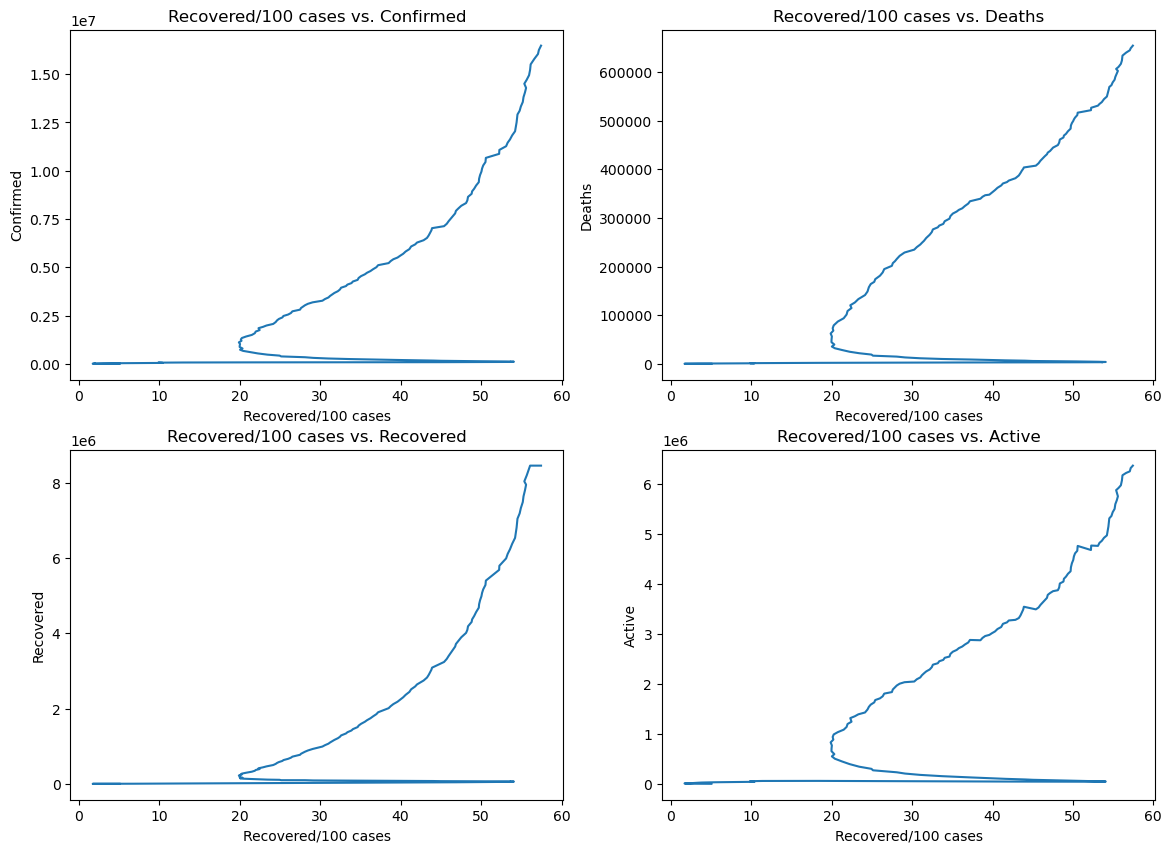

In [159]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[0]])
plt.title("Recovered/100 cases vs. Confirmed")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Confirmed")

plt.subplot(2, 2, 2)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[1]])
plt.title("Recovered/100 cases vs. Deaths")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Deaths")

plt.subplot(2, 2, 3)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[2]])
plt.title("Recovered/100 cases vs. Recovered")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Recovered")

plt.subplot(2, 2, 4)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[3]])
plt.title("Recovered/100 cases vs. Active")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Active")
plt.show()

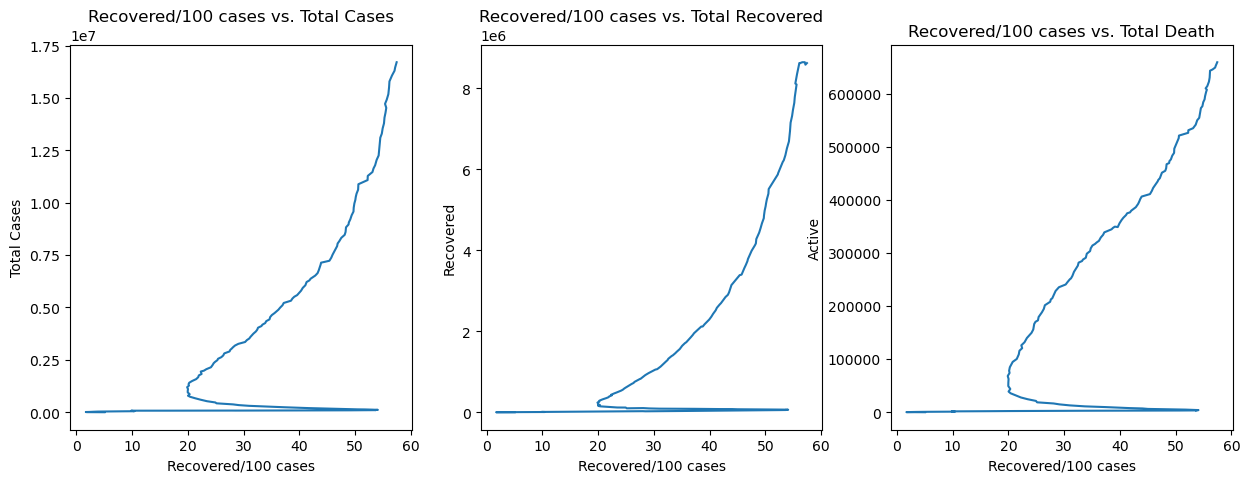

In [160]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[-1]])
plt.title("Recovered/100 cases vs. Total Cases")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Total Cases")

plt.subplot(1, 3, 2)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[-2]])
plt.title("Recovered/100 cases vs. Total Recovered")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Recovered")

plt.subplot(1, 3, 3)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[-3]])
plt.title("Recovered/100 cases vs. Total Death")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Active")
plt.show()

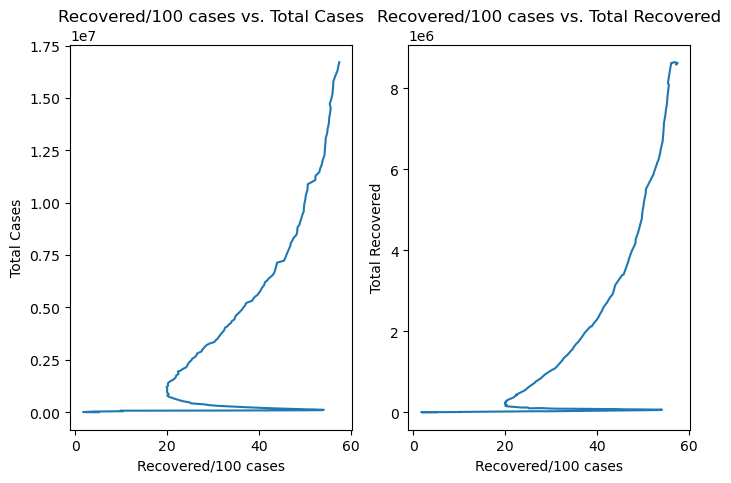

In [161]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[-1]])
plt.title("Recovered/100 cases vs. Total Cases")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Total Cases")

plt.subplot(1, 2, 2)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[-2]])
plt.title("Recovered/100 cases vs. Total Recovered")
plt.xlabel("Recovered/100 cases")
plt.ylabel("Total Recovered")

plt.show()

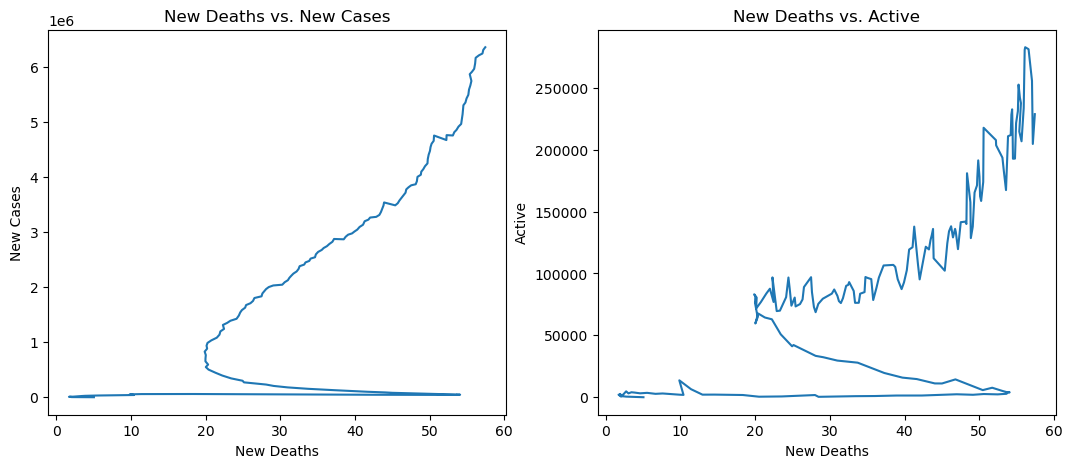

In [162]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[3]])
plt.title("New Deaths vs. New Cases")
plt.xlabel("New Deaths")
plt.ylabel("New Cases")

plt.subplot(1, 2, 2)
plt.plot(day_wise_df[num_col[-6]], day_wise_df[num_col[4]])
plt.title("New Deaths vs. Active")
plt.xlabel("New Deaths")
plt.ylabel("Active")

plt.show()

#### From the previous analysis we get:
* in the percentage of deaths /100 cases is less than th precentage of recovered/100 cases
* For Active, Recovered, Deaths and Confirmed Columns the Confirmed column takes the highest precentage and after that Active
* For New cases, New Recovered and New Deaths Columns the New cases column takes the highest precentage and after that New Recovered
* For Total cases, Total Recovered and Total Deaths Columns the Total cases column takes the highest precentage and after that Total Recovered
* There is a high change in covid 19 total different cases when the number of countries is greater than 175
* for Recovered/ 100 cases with number of countries the cases start with high value then it decreases then increaing starting from 150 to 175 then it decreases againg
* for Deaths/100 cases with the number of countries the cases start with small value then it reaches its global maximum value at 100 then it decreases then increases and so on

### Working with full_grouped dataset

In [165]:
col,num_col = cal_col(full_grouped_df)

In [166]:
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [167]:
full_grouped_df['Date'] = pd.to_datetime(full_grouped_df['Date'])

In [168]:
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [169]:
full_grouped_df.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [170]:
full_grouped_df[num_col].describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

In [171]:
full_grouped_df[full_grouped_df['New deaths']<0].count()

Date              38
Country/Region    38
Confirmed         38
Deaths            38
Recovered         38
Active            38
New cases         38
New deaths        38
New recovered     38
WHO Region        38
dtype: int64

In [172]:
# as there should be no negative values in deaths,recovered values then we are gonna to drop and if the percentage of them is big then we can get their abs val for them 
cond = (full_grouped_df['New deaths'] >= 0) & (full_grouped_df['Active'] >= 0) & (full_grouped_df['New recovered'] >= 0)
new_data = full_grouped_df[cond].copy()

In [173]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35041 non-null  datetime64[ns]
 1   Country/Region  35041 non-null  object        
 2   Confirmed       35041 non-null  int64         
 3   Deaths          35041 non-null  int64         
 4   Recovered       35041 non-null  int64         
 5   Active          35041 non-null  int64         
 6   New cases       35041 non-null  int64         
 7   New deaths      35041 non-null  int64         
 8   New recovered   35041 non-null  int64         
 9   WHO Region      35041 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.9+ MB


In [174]:
new_data.shape

(35041, 10)

In [175]:
percentage = (new_data.shape[0] / full_grouped_df.shape[0]) * 100
percentage

99.67288656274889

In [176]:
new_data[col].describe()

Date     Confirmed         Deaths  \
count                          35041  3.504100e+04   35041.000000   
mean   2020-04-24 10:20:46.608259072  2.351692e+04    1227.798493   
min              2020-01-22 00:00:00  0.000000e+00       0.000000   
25%              2020-03-08 00:00:00  1.000000e+00       0.000000   
50%              2020-04-24 00:00:00  2.460000e+02       4.000000   
75%              2020-06-10 00:00:00  3.623000e+03      78.000000   
max              2020-07-27 00:00:00  4.290259e+06  148011.000000   
std                              NaN  1.500045e+05    7423.438095   

          Recovered        Active     New cases    New deaths  New recovered  
count  3.504100e+04  3.504100e+04  35041.000000  35041.000000   35041.000000  
mean   1.103168e+04  1.125744e+04    469.348906     18.590508     271.163808  
min    0.000000e+00  0.000000e+00      0.000000      0.000000       0.000000  
25%    0.000000e+00  0.000000e+00      0.000000      0.000000       0.000000  
50%    3.300000e+01  8.400000e+01      2.000000      0.000000       0.000000  
75%    1.279000e+03  1.454000e+03     74.000000      1.000000      20.000000  
max    1.846641e+06  2.816444e+06  77255.000000   3887.000000  140050.000000  
std    6.459747e+04  8.992780e+04   3008.153287    114.807722    2067.557128

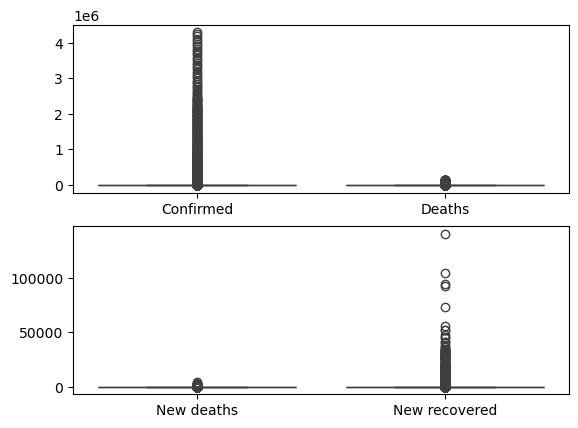

In [177]:
plt.subplot(2,1,1)
sns.boxplot(data= new_data[col[:4]])

plt.subplot(2,1,2)
sns.boxplot(data= new_data[col[-3:]])

plt.show()

In [178]:
for i in num_col:
    lower,upper = calculating_iqr(new_data,i)
    new_data[i] = new_data[i].apply(handle_outliers)

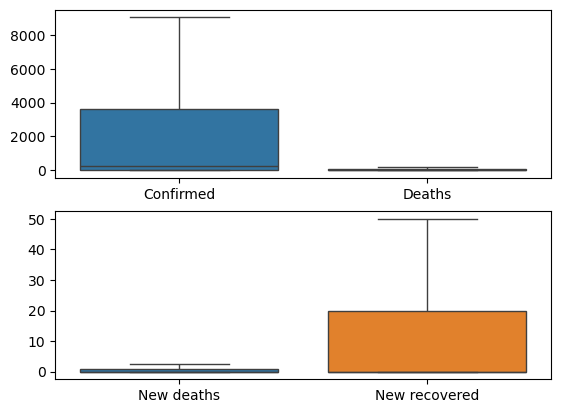

In [179]:
plt.subplot(2,1,1)
sns.boxplot(data= new_data[col[:4]])

plt.subplot(2,1,2)
sns.boxplot(data= new_data[col[-3:]])

plt.show()

In [180]:
new_data.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan        0.0     0.0        0.0     0.0        0.0   
1 2020-01-22        Albania        0.0     0.0        0.0     0.0        0.0   
2 2020-01-22        Algeria        0.0     0.0        0.0     0.0        0.0   
3 2020-01-22        Andorra        0.0     0.0        0.0     0.0        0.0   
4 2020-01-22         Angola        0.0     0.0        0.0     0.0        0.0   

   New deaths  New recovered             WHO Region  
0         0.0            0.0  Eastern Mediterranean  
1         0.0            0.0                 Europe  
2         0.0            0.0                 Africa  
3         0.0            0.0                 Europe  
4         0.0            0.0                 Africa

In [181]:
new_data.tail()

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
35151 2020-07-27  West Bank and Gaza     9056.0    78.0     3197.5  3635.0   
35152 2020-07-27      Western Sahara       10.0     1.0        8.0     1.0   
35153 2020-07-27               Yemen     1691.0   195.0      833.0   375.0   
35154 2020-07-27              Zambia     4552.0   140.0     2815.0  1597.0   
35155 2020-07-27            Zimbabwe     2704.0    36.0      542.0  2126.0   

       New cases  New deaths  New recovered             WHO Region  
35151      152.0         2.0            0.0  Eastern Mediterranean  
35152        0.0         0.0            0.0                 Africa  
35153       10.0         2.5           36.0  Eastern Mediterranean  
35154       71.0         1.0           50.0                 Africa  
35155      185.0         2.0           24.0                 Africa

#### Apply Feature Engineering

In [183]:
new_data['Total death'] = new_data['Deaths'] + new_data['New deaths']

In [185]:
new_data['Total recovered'] = new_data['Recovered'] + new_data['New recovered']

In [186]:
new_data['Total cases'] = new_data['Confirmed'] + new_data['New cases']

#### Plotting

In [188]:
col,num_col = cal_col(new_data)

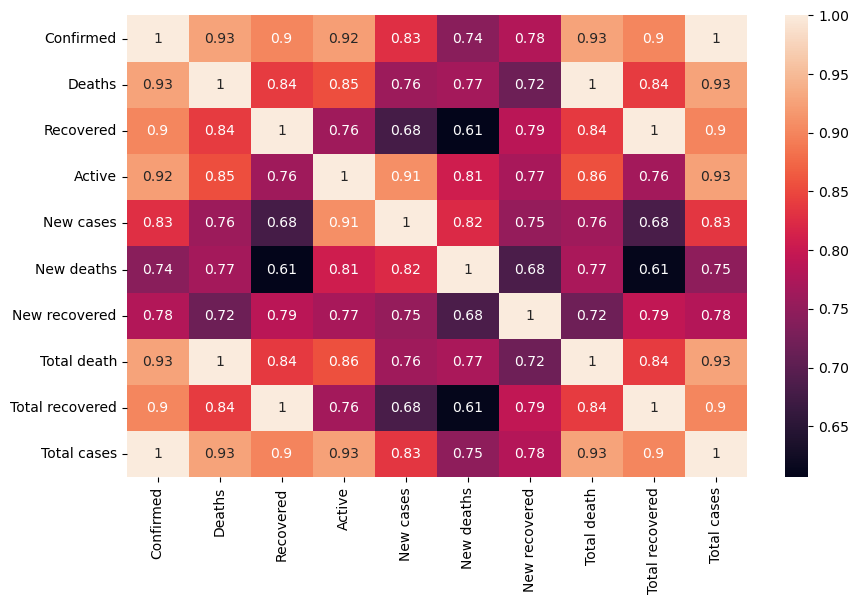

In [189]:
plt.figure(figsize=(10, 6))
cal_corr(num_col,new_data)

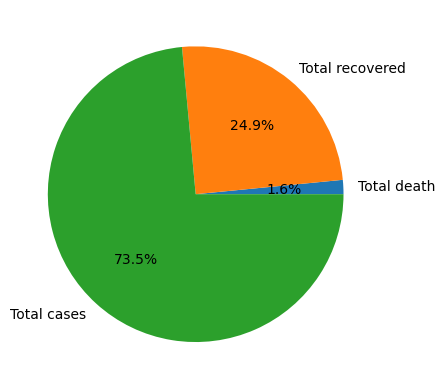

In [190]:
plt.pie(new_data[num_col[-3:]].sum(),labels = num_col[-3:],autopct = '%1.1F%%')
plt.show()

In [191]:
new_data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [192]:
Total_cases_mean = new_data.groupby('WHO Region')['Total cases'].mean()

Total_death_mean = new_data.groupby('WHO Region')['Total death'].mean()

Total_recovered_mean = new_data.groupby('WHO Region')['Total recovered'].mean()

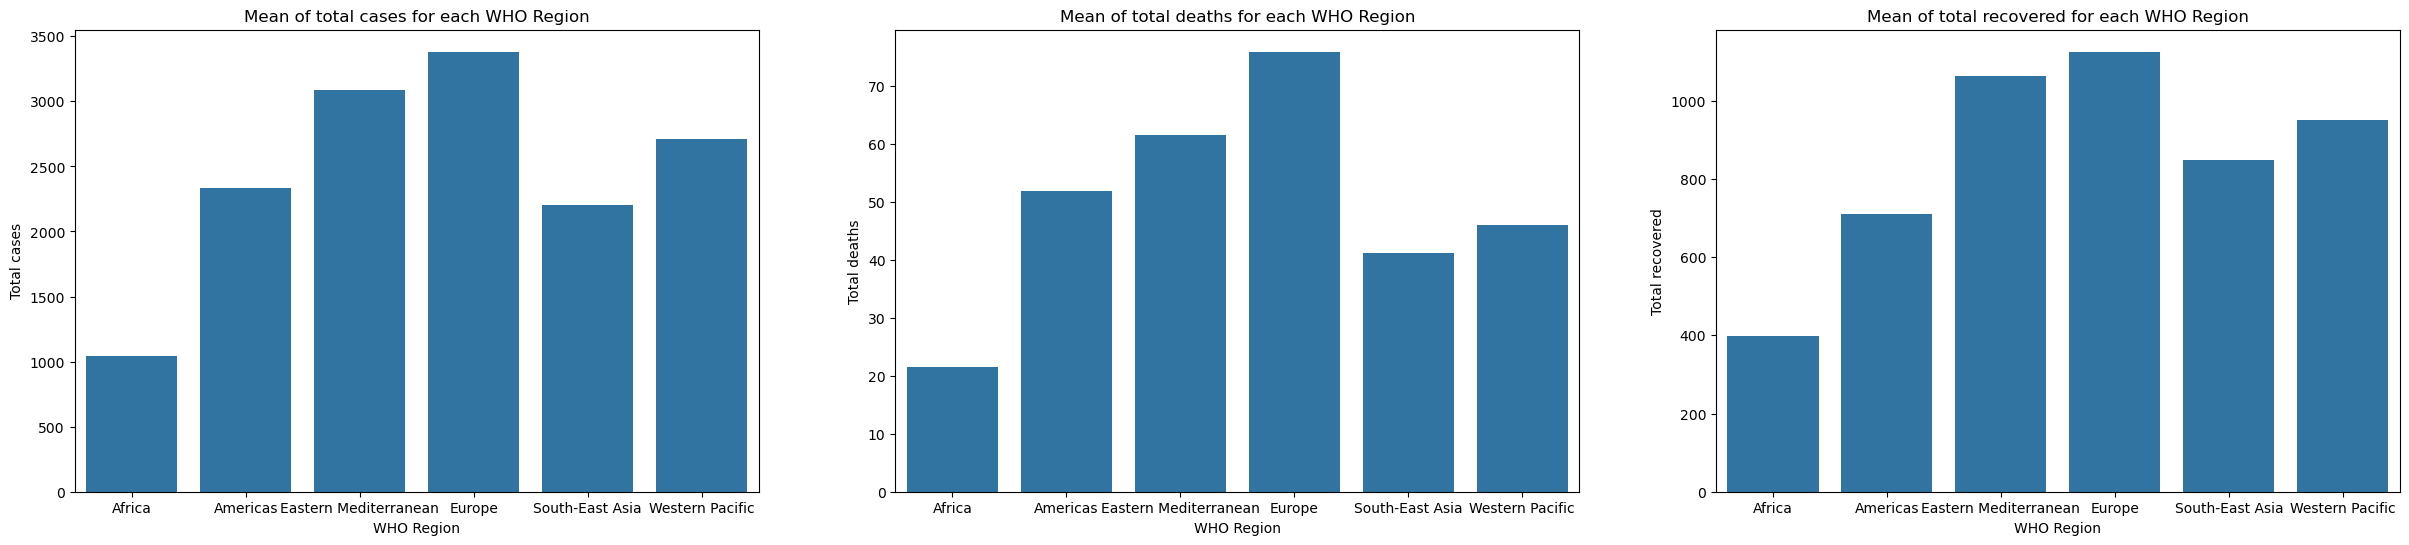

In [193]:
plt.figure(figsize=(30, 6))
plt.subplot(1,3,1)
sns.barplot(x = Total_cases_mean.index,y = Total_cases_mean.values )
plt.title('Mean of total cases for each WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total cases')

plt.subplot(1,3,2)
sns.barplot(x = Total_death_mean.index,y = Total_death_mean.values )
plt.title('Mean of total deaths for each WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total deaths')

plt.subplot(1,3,3)
sns.barplot(x = Total_recovered_mean.index,y = Total_recovered_mean.values )
plt.title('Mean of total recovered for each WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total recovered')
plt.show()
plt.show()

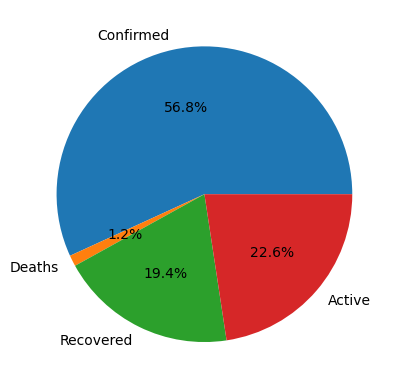

In [194]:
plt.pie(new_data[num_col[:4]].sum(),labels = num_col[:4],autopct = '%1.1F%%')
plt.show()

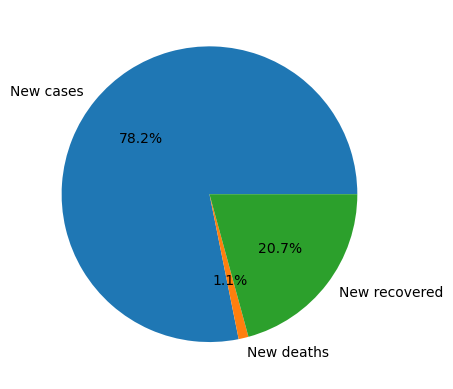

In [195]:
plt.pie(new_data[num_col[4:7]].sum(),labels = num_col[4:7],autopct = '%1.1F%%')
plt.show()

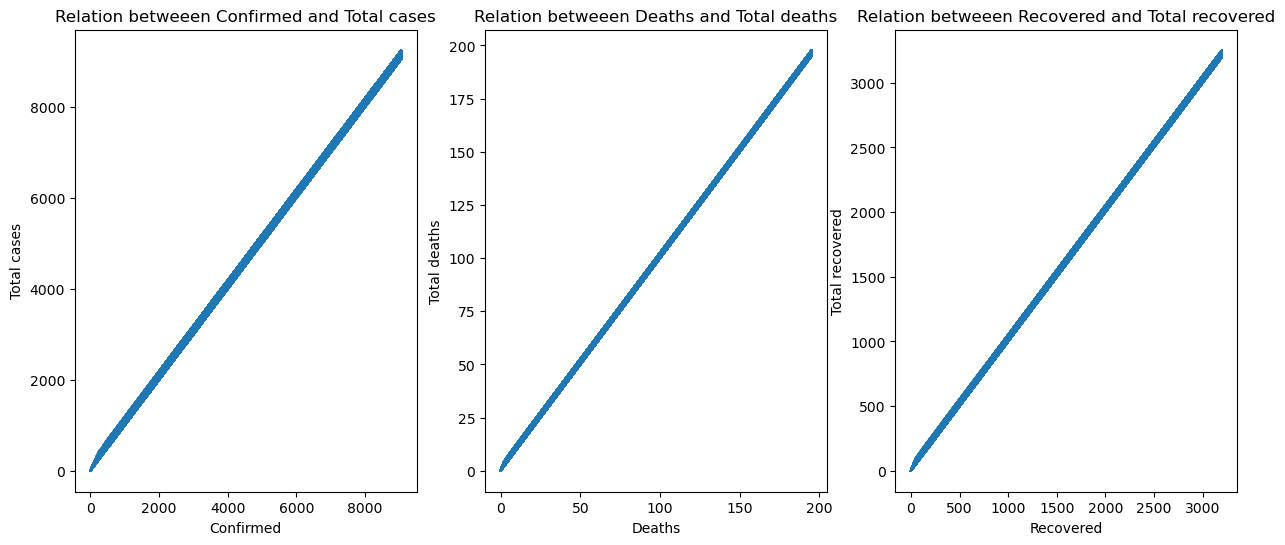

In [196]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.plot(new_data[num_col[0]], new_data[num_col[-1]])
plt.title("Relation betweeen Confirmed and Total cases")
plt.xlabel("Confirmed")
plt.ylabel("Total cases")

plt.subplot(1,3,2)
plt.plot(new_data[num_col[1]], new_data[num_col[-3]])
plt.title("Relation betweeen Deaths and Total deaths")
plt.xlabel("Deaths")
plt.ylabel("Total deaths")

plt.subplot(1,3,3)
plt.plot(new_data[num_col[2]], new_data[num_col[-2]])
plt.title("Relation betweeen Recovered and Total recovered")
plt.xlabel("Recovered")
plt.ylabel("Total recovered")

plt.show()

#### From the previous analysis we will found that
* WHO Region who takes the highest precentage for different cases in Covid 19 is Europe
* From the correlation
    * deaths has correlation = 1 with total deaths
    * confirmed has correlation = with total cases
    * recovered has correlation = 1 with total recovered
* Total recovered has high precentage than total deaths
* Active has high precentage than recovered

### Working with usa_county_wise dataset

In [199]:
col,num_col = cal_col(usa_county_wise_df)

In [200]:
usa_county_wise_df.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2  1/22/20          0       0  
3  1/22/20          0       0  
4  1/22/20          0       0

In [201]:
usa_county_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [202]:
usa_county_wise_df[['Admin2','FIPS']].nunique()

Admin2    1978
FIPS      3330
dtype: int64

In [203]:
usa_county_wise_df[usa_county_wise_df['Admin2'].isna()][['Admin2','Combined_Key']].drop_duplicates()

Admin2                  Combined_Key
0       NaN            American Samoa, US
1       NaN                      Guam, US
2       NaN  Northern Mariana Islands, US
81      NaN            Virgin Islands, US
3276    NaN          Diamond Princess, US
3329    NaN            Grand Princess, US

In [204]:
usa_county_wise_df[usa_county_wise_df['FIPS'].isna()][['Admin2','FIPS']].drop_duplicates()

Admin2  FIPS
3330                        Dukes and Nantucket   NaN
3331                                Kansas City   NaN
3332  Michigan Department of Corrections (MDOC)   NaN
3333     Federal Correctional Institution (FCI)   NaN
3334                                 Bear River   NaN
3335                               Central Utah   NaN
3336                             Southeast Utah   NaN
3337                             Southwest Utah   NaN
3338                                  TriCounty   NaN
3339                               Weber-Morgan   NaN

In [205]:
usa_county_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [206]:
drop_na_df = usa_county_wise_df.dropna(how ='any',axis = 0).copy()
drop_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624912 entries, 3 to 627908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             624912 non-null  int64  
 1   iso2            624912 non-null  object 
 2   iso3            624912 non-null  object 
 3   code3           624912 non-null  int64  
 4   FIPS            624912 non-null  float64
 5   Admin2          624912 non-null  object 
 6   Province_State  624912 non-null  object 
 7   Country_Region  624912 non-null  object 
 8   Lat             624912 non-null  float64
 9   Long_           624912 non-null  float64
 10  Combined_Key    624912 non-null  object 
 11  Date            624912 non-null  object 
 12  Confirmed       624912 non-null  int64  
 13  Deaths          624912 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 71.5+ MB


In [207]:
calculate_percentage = (drop_na_df.shape[0]/usa_county_wise_df.shape[0]) * 100
calculate_percentage

99.52095808383234

In [208]:
drop_na_df['Date'] = pd.to_datetime(drop_na_df['Date'],format='%m/%d/%y')

In [209]:
drop_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624912 entries, 3 to 627908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   UID             624912 non-null  int64         
 1   iso2            624912 non-null  object        
 2   iso3            624912 non-null  object        
 3   code3           624912 non-null  int64         
 4   FIPS            624912 non-null  float64       
 5   Admin2          624912 non-null  object        
 6   Province_State  624912 non-null  object        
 7   Country_Region  624912 non-null  object        
 8   Lat             624912 non-null  float64       
 9   Long_           624912 non-null  float64       
 10  Combined_Key    624912 non-null  object        
 11  Date            624912 non-null  datetime64[ns]
 12  Confirmed       624912 non-null  int64         
 13  Deaths          624912 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4

In [210]:
drop_na_df['Country_Region'].unique()

array(['US'], dtype=object)

In [211]:
drop_na_df.rename(columns={'Long_': 'Long'}, inplace=True)

In [212]:
col,num_col = cal_col(drop_na_df)

#### Apply Plotting

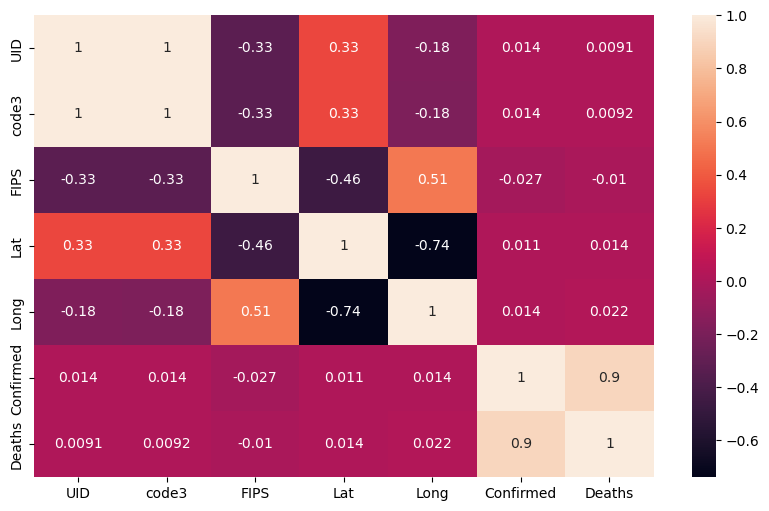

In [214]:
plt.figure(figsize=(10, 6))
cal_corr(num_col,drop_na_df)

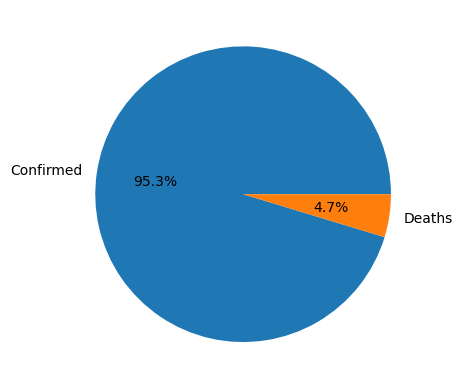

In [215]:
data = drop_na_df[num_col[-2:]].sum()
plt.pie(data,labels = num_col[-2:],autopct = '%1.1F%%')
plt.show()

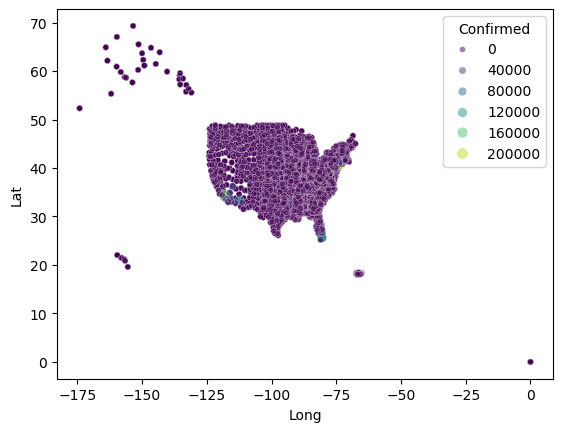

In [216]:
sns.scatterplot(
    data = drop_na_df,
    x = num_col[-3],
    y = num_col[-4],
    size = num_col[-2],
    hue = num_col[-2],
    palette="viridis",
    alpha=0.5,
)
plt.show()

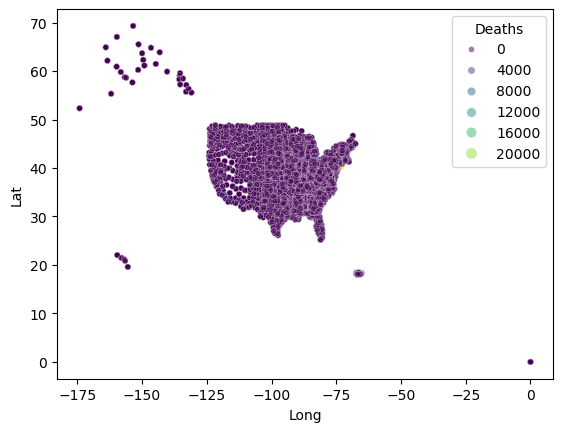

In [217]:
sns.scatterplot(
    data = drop_na_df,
    x = num_col[-3],
    y = num_col[-4],
    size = num_col[-1],
    hue = num_col[-1],
    palette="viridis",
    alpha=0.5,
)
plt.show()

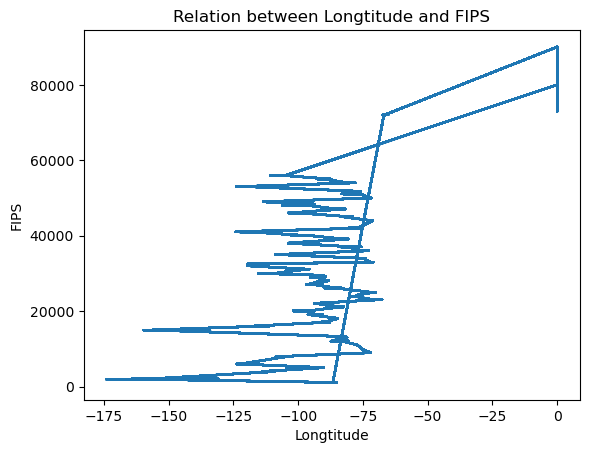

In [218]:
plt.plot(drop_na_df[num_col[-3]], drop_na_df[num_col[2]])
plt.title("Relation between Longtitude and FIPS")
plt.xlabel("Longtitude")
plt.ylabel("FIPS")
plt.show()

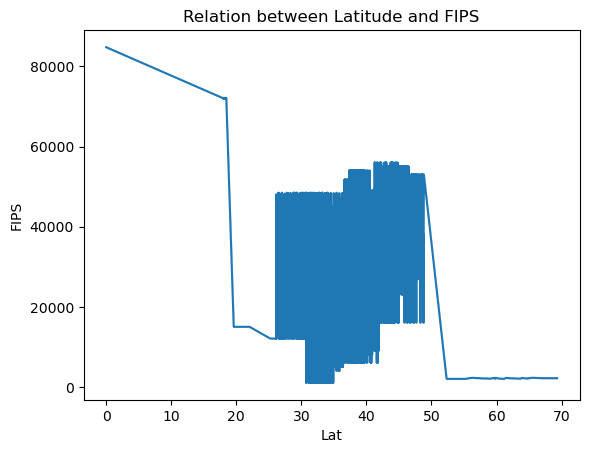

In [219]:
sns.lineplot(x = num_col[-4],y = num_col[2],data = drop_na_df)
plt.title("Relation between Latitude and FIPS")
plt.show()

In [220]:
drop_na_df.drop(['Country_Region','Combined_Key'],axis = 1,inplace = True)

#### From the pervious analysis 
* we will find that a high percentage of confirmed and deaths in USA is in between -70 and -127 in longtitude and -25 to -50 in latitude  
* as the Country_Region column contains only usa value then it isn't gonna be useful in the model so we are gonna drop it 
* as Combined_Key column are splitted into Admin2, Province_State, Country_Region columns so we can drop it  

### Working with worldometer_data dataset

In [223]:
col,num_col = cal_col(worldometer_data_df)

In [224]:
# getting precentage of data exist in each column
threshold = worldometer_data_df.shape[0] * 0.5
threshold

104.5

In [225]:
col_to_drop = worldometer_data_df.columns[worldometer_data_df.isna().sum() >= threshold]
col_to_drop

Index(['NewCases', 'NewDeaths', 'NewRecovered'], dtype='object')

In [226]:
worldometer_data_df.drop(col_to_drop, inplace = True,axis = 1)

In [227]:
worldometer_data_df.head()

Country/Region      Continent    Population  TotalCases  TotalDeaths  \
0            USA  North America  3.311981e+08     5032179     162804.0   
1         Brazil  South America  2.127107e+08     2917562      98644.0   
2          India           Asia  1.381345e+09     2025409      41638.0   
3         Russia         Europe  1.459409e+08      871894      14606.0   
4   South Africa         Africa  5.938157e+07      538184       9604.0   

   TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
0       2576668.0    2292707.0           18296.0           15194.0   
1       2047660.0     771258.0            8318.0           13716.0   
2       1377384.0     606387.0            8944.0            1466.0   
3        676357.0     180931.0            2300.0            5974.0   
4        387316.0     141264.0             539.0            9063.0   

   Deaths/1M pop  TotalTests  Tests/1M pop      WHO Region  
0          492.0  63139605.0      190640.0        Americas  
1          464.0  13206188.0       62085.0        Americas  
2           30.0  22149351.0       16035.0  South-EastAsia  
3          100.0  29716907.0      203623.0          Europe  
4          162.0   3149807.0       53044.0          Africa

In [228]:
worldometer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [229]:
# Renaming columns:
worldometer_data_df.rename(columns={'TotalCases': 'Total Cases','TotalDeaths':'Total Deaths','TotalRecovered':'Total Recovered','ActiveCases':'Active Cases','Serious,Critical':'Serious/Critical'\
                                   ,'Tot Cases/1M pop': 'Total Cases/1M pop', 'TotalTests':'Total Tests'}, inplace=True)

In [230]:
worldometer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country/Region      209 non-null    object 
 1   Continent           208 non-null    object 
 2   Population          208 non-null    float64
 3   Total Cases         209 non-null    int64  
 4   Total Deaths        188 non-null    float64
 5   Total Recovered     205 non-null    float64
 6   Active Cases        205 non-null    float64
 7   Serious/Critical    122 non-null    float64
 8   Total Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop       187 non-null    float64
 10  Total Tests         191 non-null    float64
 11  Tests/1M pop        191 non-null    float64
 12  WHO Region          184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [231]:
worldometer_data_df[worldometer_data_df['Continent'].isna()][['Continent','Country/Region']].drop_duplicates()

Continent    Country/Region
156       NaN  Diamond Princess

In [232]:
worldometer_data_df[worldometer_data_df['Country/Region'] == 'Diamond Princess'][['Continent','Country/Region']]

Continent    Country/Region
156       NaN  Diamond Princess

In [233]:
# dropping null values in 'Country/Region' and population 
worldometer_data_df.dropna(subset = ['Country/Region','Population'],inplace = True)

In [234]:
worldometer_data_df[worldometer_data_df['WHO Region'].isna()][['WHO Region','Continent','Country/Region' ]]

WHO Region          Continent          Country/Region
84         NaN      South America           French Guiana
102        NaN             Africa                     CAR
112        NaN             Africa                 Mayotte
158        NaN             Africa                 Réunion
159        NaN             Europe         Channel Islands
167        NaN             Europe             Isle of Man
170        NaN      North America              Guadeloupe
171        NaN      North America              Martinique
172        NaN             Europe          Faeroe Islands
173        NaN      North America                   Aruba
176        NaN      North America          Cayman Islands
177        NaN             Europe               Gibraltar
179        NaN      North America            Sint Maarten
181        NaN               Asia                 Brunei 
183        NaN      North America        Turks and Caicos
190        NaN  Australia/Oceania        French Polynesia
191        NaN      North America  St. Vincent Grenadines
192        NaN      North America            Saint Martin
193        NaN               Asia                   Macao
194        NaN      North America                 Curaçao
199        NaN  Australia/Oceania           New Caledonia
204        NaN      North America              Montserrat
205        NaN      North America   Caribbean Netherlands
206        NaN      South America        Falkland Islands

In [235]:
continent_dict = worldometer_data_df.groupby('Continent')['WHO Region'].first().to_dict()
continent_dict

{'Africa': 'Africa',
 'Asia': 'South-EastAsia',
 'Australia/Oceania': 'WesternPacific',
 'Europe': 'Europe',
 'North America': 'Americas',
 'South America': 'Americas'}

In [236]:
worldometer_data_df['WHO Region'] = worldometer_data_df['WHO Region'].fillna(worldometer_data_df['Continent'].map(continent_dict))

In [237]:
worldometer_data_df['WHO Region'].unique()

array(['Americas', 'South-EastAsia', 'Europe', 'Africa',
       'EasternMediterranean', 'WesternPacific'], dtype=object)

In [238]:
worldometer_data_df[worldometer_data_df['Total Tests'].isna()][['Total Tests','Tests/1M pop']]

Total Tests  Tests/1M pop
54           NaN           NaN
82           NaN           NaN
86           NaN           NaN
106          NaN           NaN
108          NaN           NaN
111          NaN           NaN
130          NaN           NaN
138          NaN           NaN
142          NaN           NaN
145          NaN           NaN
149          NaN           NaN
161          NaN           NaN
163          NaN           NaN
169          NaN           NaN
184          NaN           NaN
207          NaN           NaN
208          NaN           NaN

In [239]:
# as Total Tests at least equals total cases then null values in total tests = total cases
worldometer_data_df['Total Tests'] = worldometer_data_df['Total Tests'].fillna(worldometer_data_df['Total Cases'])

In [240]:
# Total cases = Active + deaths + recovered   
values_replaced_with = worldometer_data_df['Total Cases'] - (worldometer_data_df['Total Recovered'] + worldometer_data_df['Active Cases'])
worldometer_data_df['Total Deaths'] = worldometer_data_df['Total Deaths'].fillna(values_replaced_with)

In [241]:
col,num_col = cal_col(worldometer_data_df)

In [242]:
worldometer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country/Region      208 non-null    object 
 1   Continent           208 non-null    object 
 2   Population          208 non-null    float64
 3   Total Cases         208 non-null    int64  
 4   Total Deaths        208 non-null    float64
 5   Total Recovered     204 non-null    float64
 6   Active Cases        204 non-null    float64
 7   Serious/Critical    121 non-null    float64
 8   Total Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop       187 non-null    float64
 10  Total Tests         208 non-null    float64
 11  Tests/1M pop        191 non-null    float64
 12  WHO Region          208 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 22.8+ KB


In [243]:
# Total cases = Active + deaths + recovered   
values_replaced_with = worldometer_data_df['Total Cases'] - (worldometer_data_df['Total Deaths'] + worldometer_data_df['Active Cases'])
worldometer_data_df['Total Recovered'] = worldometer_data_df['Total Recovered'].fillna(values_replaced_with)

replace_values_in_test_percent = (worldometer_data_df['Total Tests'] / worldometer_data_df['Population'] ) *1000000
worldometer_data_df['Tests/1M pop'] = worldometer_data_df['Tests/1M pop'].fillna(replace_values_in_test_percent)

replace_values_in_test_percent = (worldometer_data_df['Total Deaths'] / worldometer_data_df['Population'] ) *1000000
worldometer_data_df['Deaths/1M pop'] = worldometer_data_df['Deaths/1M pop'].fillna(replace_values_in_test_percent)

In [244]:
worldometer_data_df = worldometer_data_df.fillna(0)

In [245]:
worldometer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country/Region      208 non-null    object 
 1   Continent           208 non-null    object 
 2   Population          208 non-null    float64
 3   Total Cases         208 non-null    int64  
 4   Total Deaths        208 non-null    float64
 5   Total Recovered     208 non-null    float64
 6   Active Cases        208 non-null    float64
 7   Serious/Critical    208 non-null    float64
 8   Total Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop       208 non-null    float64
 10  Total Tests         208 non-null    float64
 11  Tests/1M pop        208 non-null    float64
 12  WHO Region          208 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 22.8+ KB


In [246]:
worldometer_data_df[num_col] = worldometer_data_df[num_col].astype(int)

In [247]:
worldometer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Region      208 non-null    object
 1   Continent           208 non-null    object
 2   Population          208 non-null    int32 
 3   Total Cases         208 non-null    int32 
 4   Total Deaths        208 non-null    int32 
 5   Total Recovered     208 non-null    int32 
 6   Active Cases        208 non-null    int32 
 7   Serious/Critical    208 non-null    int32 
 8   Total Cases/1M pop  208 non-null    int32 
 9   Deaths/1M pop       208 non-null    int32 
 10  Total Tests         208 non-null    int32 
 11  Tests/1M pop        208 non-null    int32 
 12  WHO Region          208 non-null    object
dtypes: int32(10), object(3)
memory usage: 14.6+ KB


In [248]:
worldometer_data_df.describe()

Population   Total Cases   Total Deaths  Total Recovered  \
count  2.080000e+02  2.080000e+02     208.000000     2.080000e+02   
mean   3.041549e+07  9.215603e+04    3427.855769     5.802663e+04   
std    1.047661e+08  4.335840e+05   14762.629768     2.549293e+05   
min    8.010000e+02  1.000000e+01       0.000000     0.000000e+00   
25%    9.663140e+05  7.312500e+02      11.750000     3.070000e+02   
50%    7.041972e+06  4.544000e+03      73.000000     2.073500e+03   
75%    2.575614e+07  3.733675e+04     604.250000     1.983525e+04   
max    1.381345e+09  5.032179e+06  162804.000000     2.576668e+06   

       Active Cases  Serious/Critical  Total Cases/1M pop  Deaths/1M pop  \
count  2.080000e+02        208.000000          208.000000     208.000000   
mean   2.726509e+04        313.423077         3196.024038      88.697115   
std    1.733942e+05       1587.511422         5191.986457     168.512502   
min    0.000000e+00          0.000000            3.000000       0.000000   
25%    7.400000e+01          0.000000          282.000000       4.000000   
50%    8.620000e+02          2.000000         1015.000000      20.000000   
75%    7.115750e+03         41.250000         3841.750000      82.000000   
max    2.292707e+06      18296.000000        39922.000000    1238.000000   

        Total Tests   Tests/1M pop  
count  2.080000e+02     208.000000  
mean   1.288116e+06   77196.153846  
std    5.334286e+06  148082.071315  
min    1.000000e+01       4.000000  
25%    1.180775e+04    6494.000000  
50%    1.123535e+05   29793.500000  
75%    7.001068e+05   77340.500000  
max    6.313960e+07  995282.000000

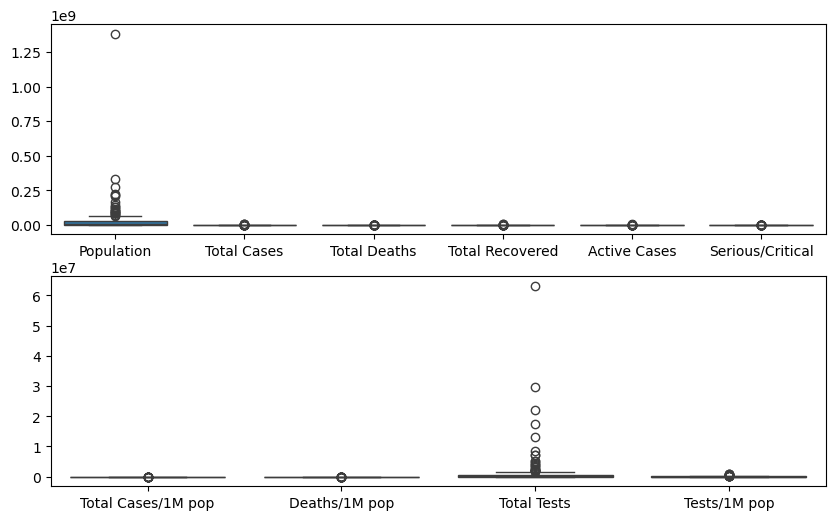

In [249]:
plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
sns.boxplot(data= worldometer_data_df[num_col[:6]])

plt.subplot(2,1,2)
sns.boxplot(data= worldometer_data_df[num_col[6:]])

plt.show()

In [250]:
for i in num_col:
        lower,upper = calculating_iqr(worldometer_data_df,i)
        worldometer_data_df[i] = worldometer_data_df[i].apply(handle_outliers)

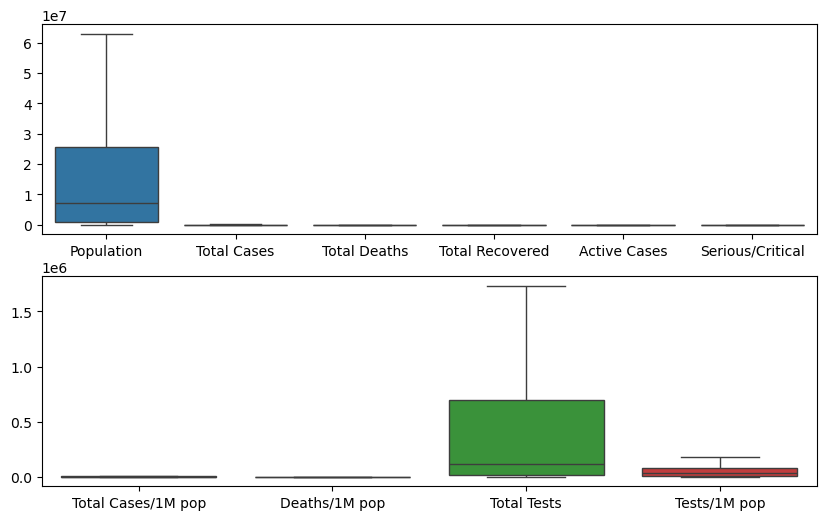

In [251]:
plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
sns.boxplot(data= worldometer_data_df[num_col[:6]])

plt.subplot(2,1,2)
sns.boxplot(data= worldometer_data_df[num_col[6:]])

plt.show()

#### Apply Plotting

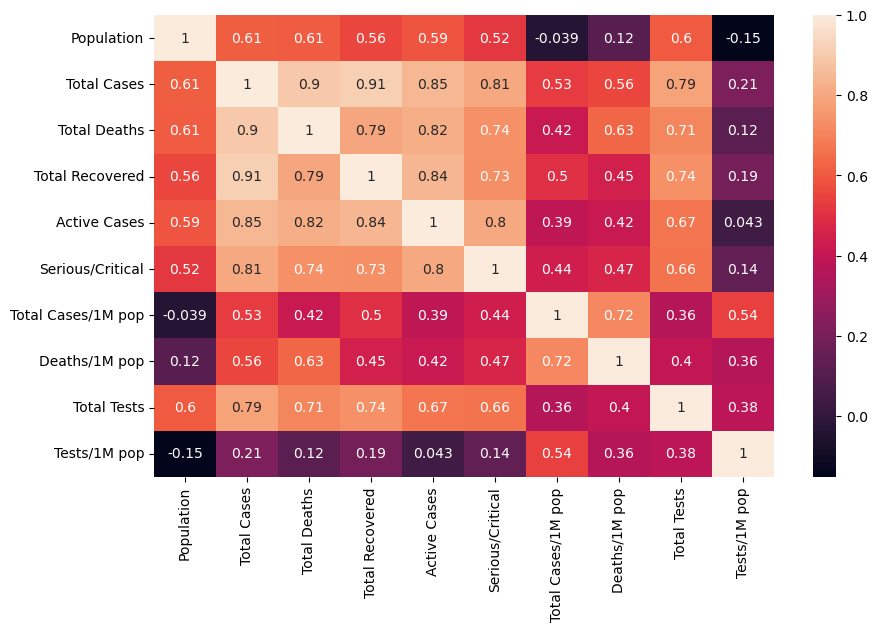

In [253]:
plt.figure(figsize=(10, 6))
corr = worldometer_data_df[num_col].corr()
sns.heatmap(data = corr, annot = True)
plt.show()

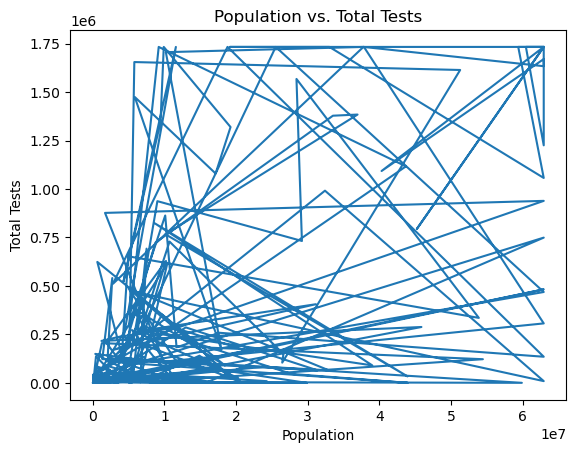

In [254]:
plt.plot( worldometer_data_df[num_col[0]], worldometer_data_df[num_col[-2]])
plt.title("Population vs. Total Tests")
plt.xlabel("Population")
plt.ylabel("Total Tests")
plt.show()

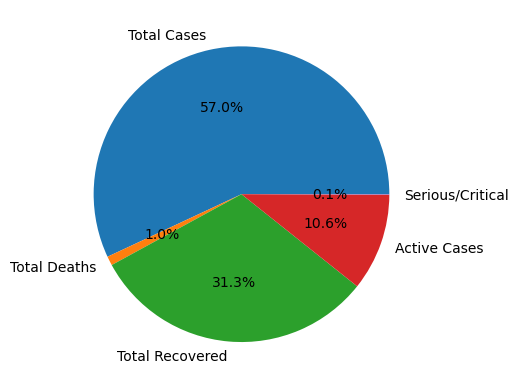

In [256]:
data = worldometer_data_df[num_col[1:6]].sum()
plt.pie(data,labels = num_col[1:6],autopct = '%1.1F%%')
plt.show()

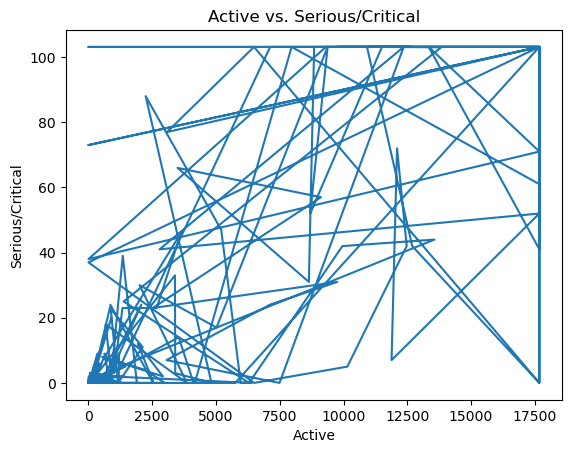

In [257]:
plt.plot( worldometer_data_df[num_col[4]], worldometer_data_df[num_col[5]])
plt.title("Active vs. Serious/Critical")
plt.xlabel("Active")
plt.ylabel("Serious/Critical")
plt.show()

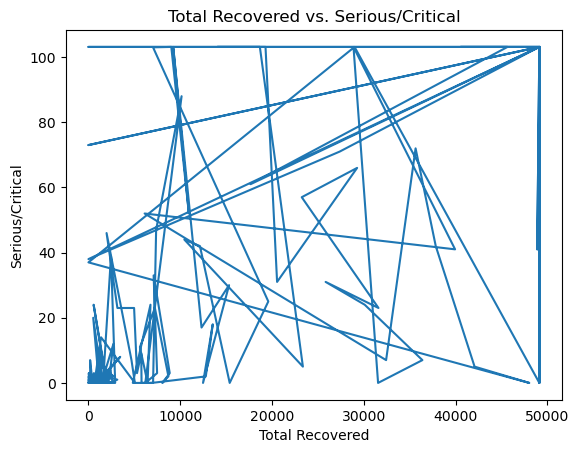

In [258]:
plt.plot( worldometer_data_df[num_col[3]], worldometer_data_df[num_col[5]])
plt.title("Total Recovered vs. Serious/Critical")
plt.xlabel("Total Recovered")
plt.ylabel("Serious/Critical")
plt.show()

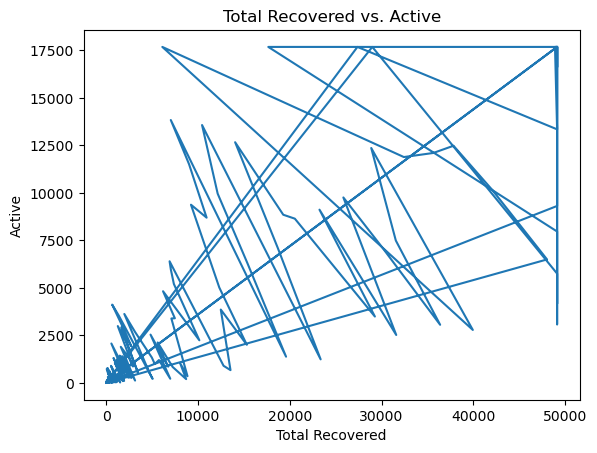

In [259]:
plt.plot( worldometer_data_df[num_col[3]], worldometer_data_df[num_col[4]])
plt.title("Total Recovered vs. Active")
plt.xlabel("Total Recovered")
plt.ylabel("Active")
plt.show()

In [260]:
worldometer_data_df[num_col[1:6]].sum()

Total Cases         4906916.000
Total Deaths          86361.000
Total Recovered     2700385.750
Active Cases         916791.125
Serious/Critical       5400.375
dtype: float64

In [261]:
labels = ['Total Cases','Total Deaths','Total Recovered','Active Cases','Serious/Critical']
vals = list(worldometer_data_df[num_col[1:6]].sum())

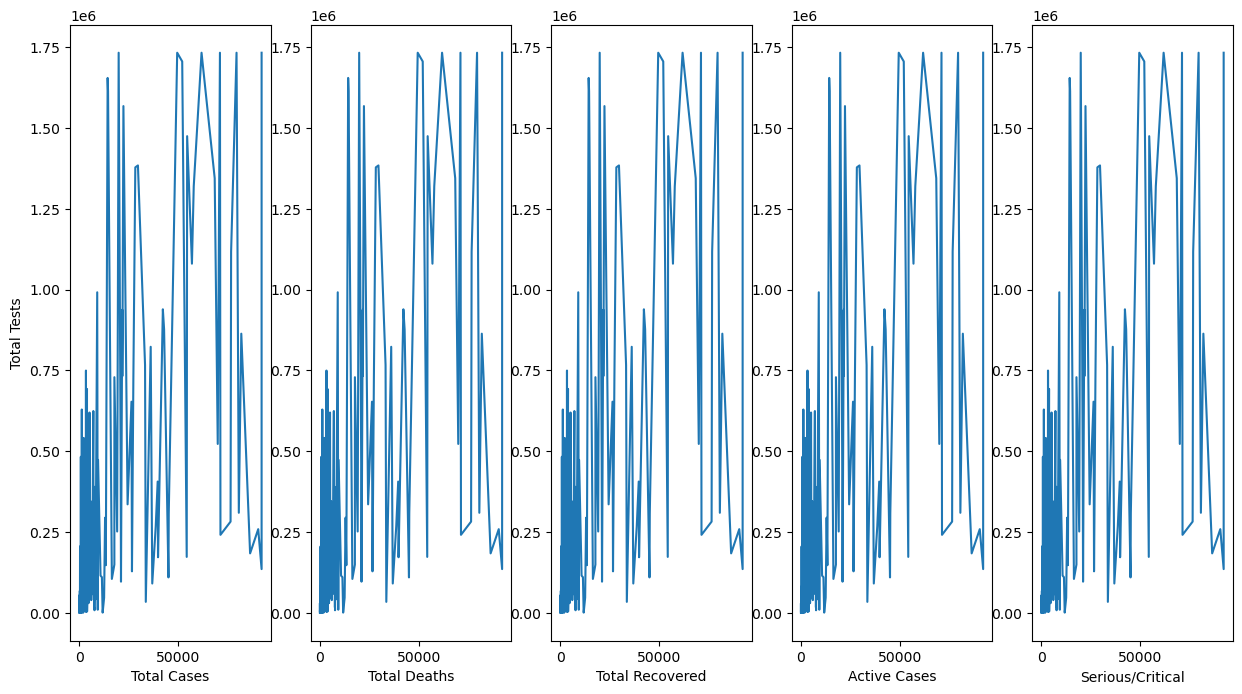

In [262]:
plt.figure(figsize=(15, 8))

plt.subplot(1,5,1)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[-2]])
plt.xlabel("Total Cases")
plt.ylabel("Total Tests")

plt.subplot(1,5,2)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[-2]])
plt.xlabel("Total Deaths")

plt.subplot(1,5,3)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[-2]])
plt.xlabel("Total Recovered")

plt.subplot(1,5,4)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[-2]])
plt.xlabel("Active Cases")

plt.subplot(1,5,5)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[-2]])
plt.xlabel("Serious/Critical")
plt.show()

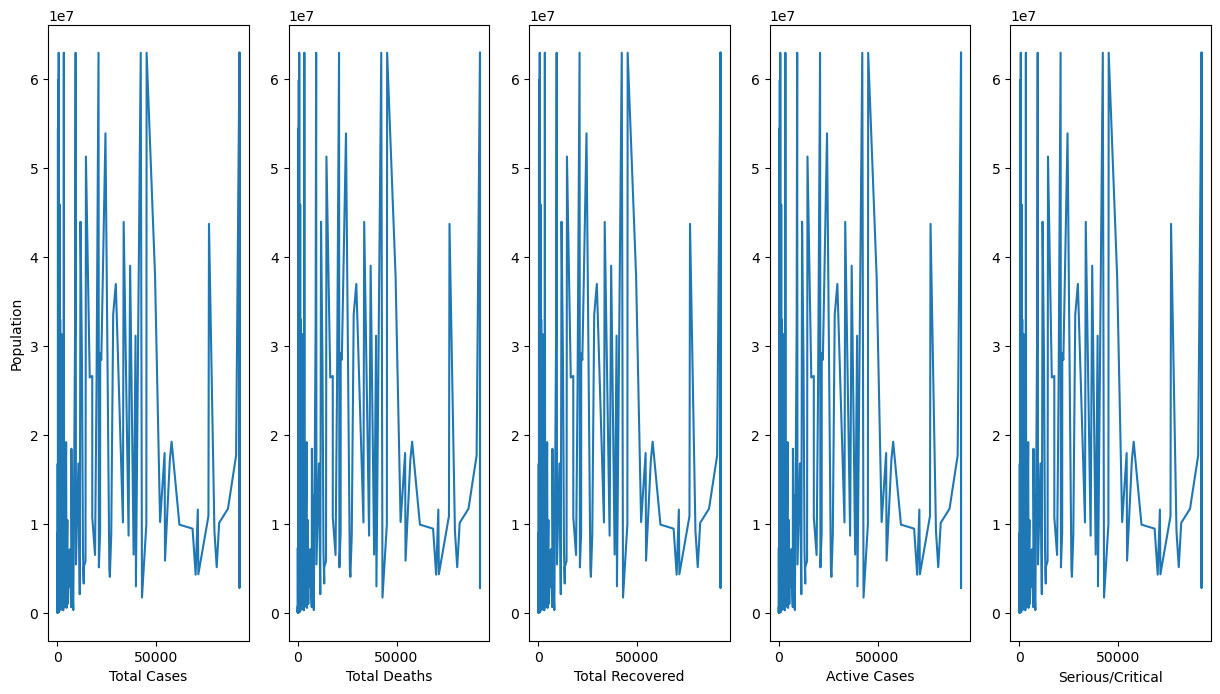

In [263]:
plt.figure(figsize=(15, 8))

plt.subplot(1,5,1)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[0]])
plt.xlabel("Total Cases")
plt.ylabel("Population")

plt.subplot(1,5,2)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[0]])
plt.xlabel("Total Deaths")

plt.subplot(1,5,3)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[0]])
plt.xlabel("Total Recovered")

plt.subplot(1,5,4)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[0]])
plt.xlabel("Active Cases")

plt.subplot(1,5,5)
plt.plot( worldometer_data_df[num_col[1]], worldometer_data_df[num_col[0]])
plt.xlabel("Serious/Critical")
plt.show()

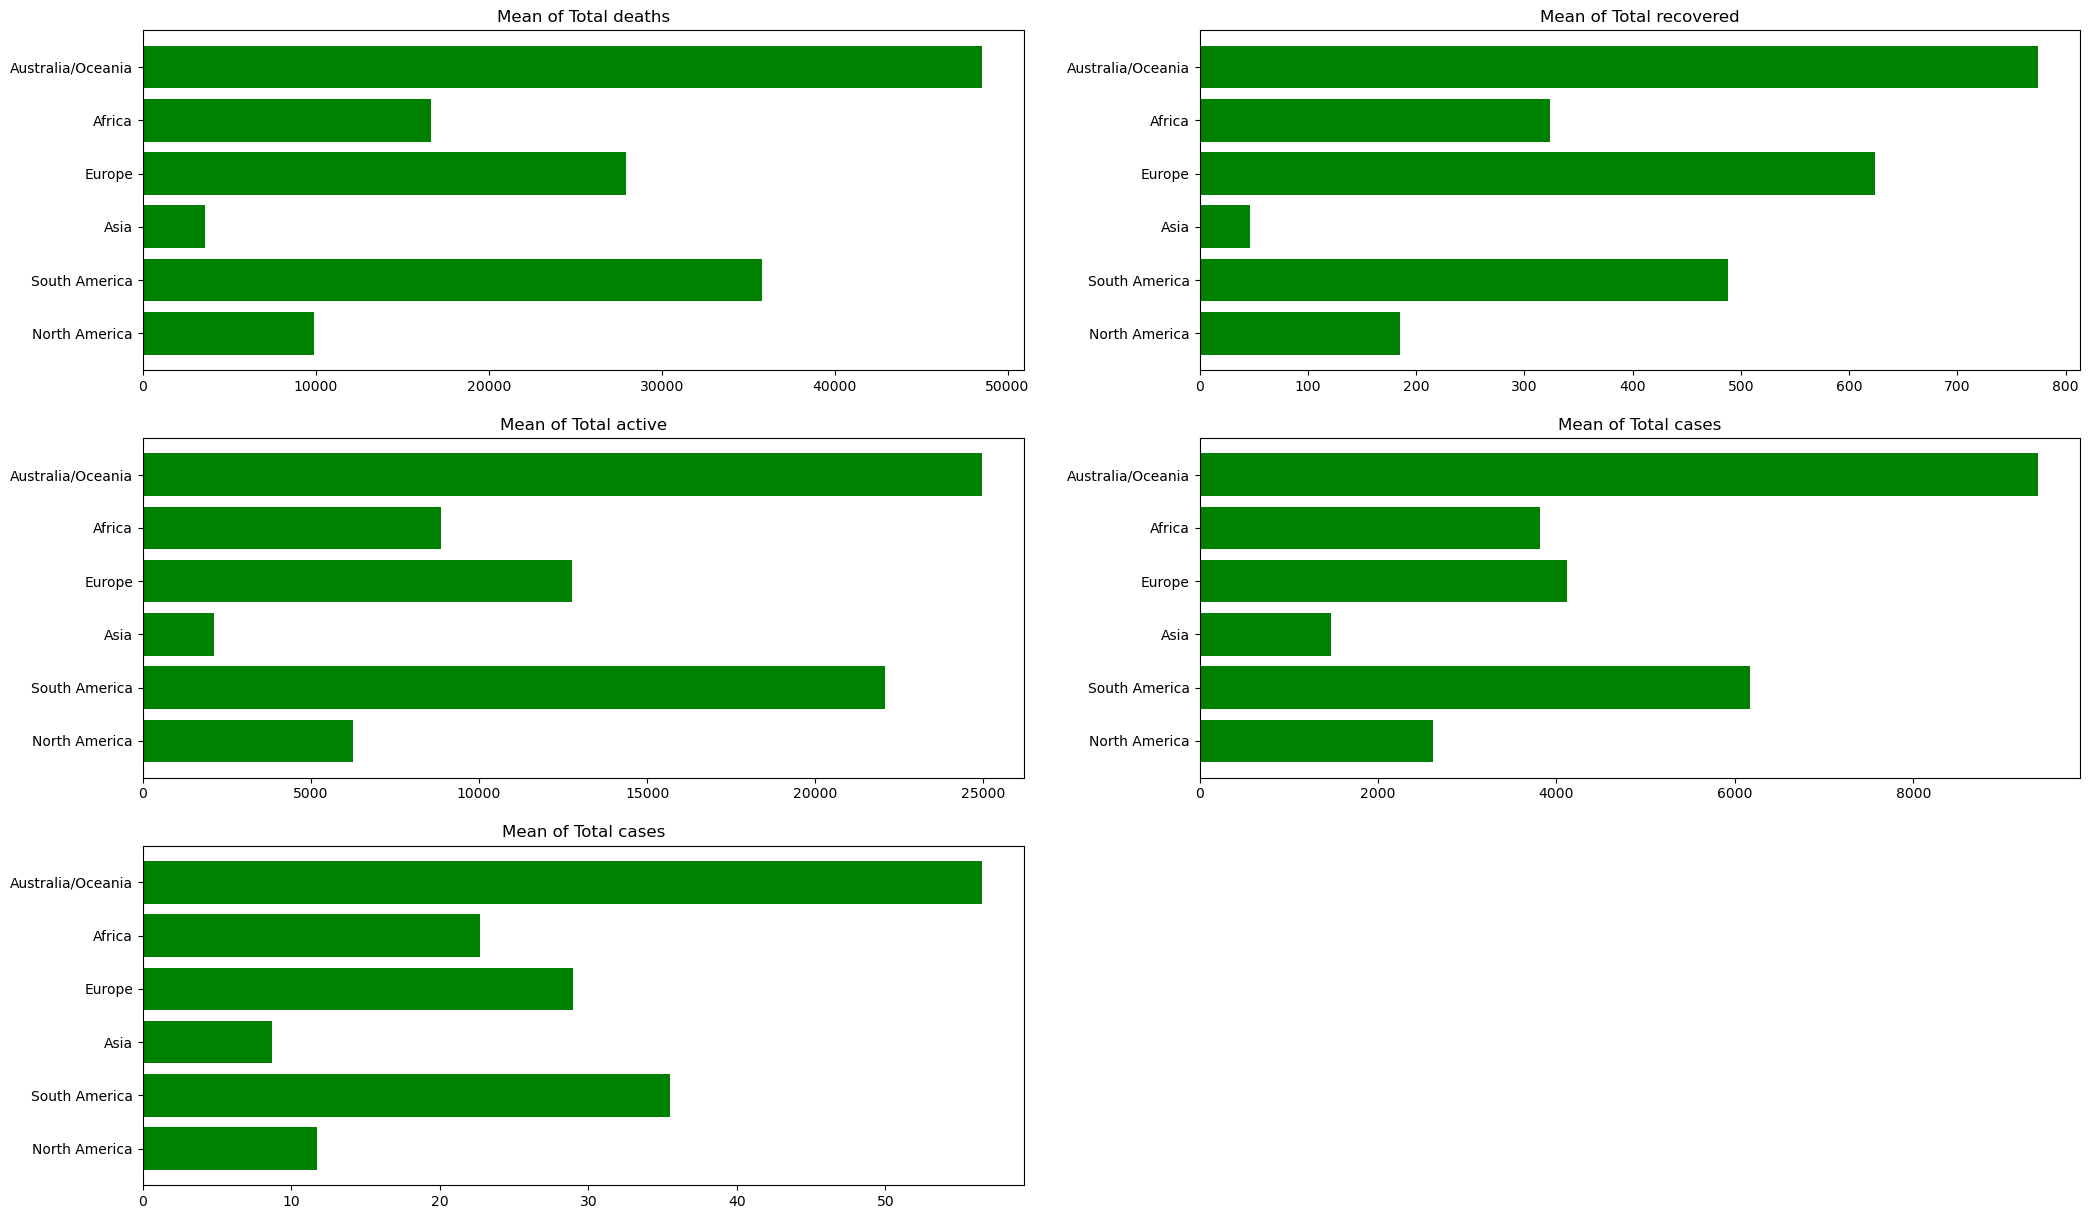

In [264]:
plt.figure(figsize=(25, 15))
plt.subplot(3,2,1)
plt.barh(worldometer_data_df['Continent'].unique(),worldometer_data_df.groupby('Continent')['Total Cases'].mean(),color = 'green')
plt.title('Mean of Total deaths')

plt.subplot(3,2,2)
plt.barh(worldometer_data_df['Continent'].unique(),worldometer_data_df.groupby('Continent')['Total Deaths'].mean(),color = 'green')
plt.title('Mean of Total recovered')

plt.subplot(3,2,3)
plt.barh(worldometer_data_df['Continent'].unique(),worldometer_data_df.groupby('Continent')['Total Recovered'].mean(),color = 'green')
plt.title('Mean of Total active')

plt.subplot(3,2,4)
plt.barh(worldometer_data_df['Continent'].unique(),worldometer_data_df.groupby('Continent')['Active Cases'].mean(),color = 'green')
plt.title('Mean of Total cases')

plt.subplot(3,2,5)
plt.barh(worldometer_data_df['Continent'].unique(),worldometer_data_df.groupby('Continent')['Serious/Critical'].mean(),color = 'green')
plt.title('Mean of Total cases')

plt.show()

#### From previous analysis:
* Serious/Critical case take the least precentage in all different cases
* at some point there is a peak where (total deaths, total cases, total recovered, active cases, serious/critical) when ploting it with population
* Over different cases Ausralia/Ocieania Contient has the highest mean

### Saving Data into csv files

In [267]:
# saving all new datasets into files
country_wise_df.to_csv('country_wise_updated.csv', index=False)
covid_19_clean_complete_df.to_csv('covid_19_clean_complete_updated.csv', index=False)
day_wise_df.to_csv('day_wise_updated.csv', index=False)
full_grouped_df.to_csv('full_grouped_updated.csv', index=False)
drop_na_df.to_csv('usa_county_wise_updated.csv', index=False)
worldometer_data_df.to_csv('worldometer_data_updated.csv', index=False)
print("Filtered data saved.")

Filtered data saved.
